In [28]:
import xarray as xr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import metpy
import glob
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import time

In [3]:
richmond_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Richmond/barra_sy_20011130_20011206.nc')
sydney_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Sydney/barra_sy_20160111_20160117.nc')
badgery_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Badgery/barra_sy_20160125_20160131.nc')
wagga_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Wagga/barra_sy_20090117_20090123.nc')
moree_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Moree/barra_sy_20151213_20151219.nc')
tamworth_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW_analysis/SCW_analysis/read_model_data/data/Tamworth/barra_sy_20170214_20170220.nc')


In [4]:
richmond_data = richmond_data_1.sel(lat = -33.60, lon = 150.78, method = 'nearest')
sydney_data = sydney_data_1.sel(lat =  -33.95, lon = 151.17, method = 'nearest')
badgery_data = badgery_data_1.sel(lat =  -33.90, lon = 150.73, method = 'nearest')
wagga_data = wagga_data_1.sel(lat =  -35.16, lon = 147.46, method = 'nearest')
moree_data = moree_data_1.sel(lat =  -29.49, lon = 149.85, method = 'nearest')
tamworth_data = tamworth_data_1.sel(lat =  -31.07, lon = 150.84, method = 'nearest')

In [ ]:
# richmond_data = richmond_data_1.sel(lat = -33.891, lon = 150.662, method = 'nearest')
# sydney_data = sydney_data_1.sel(lat =  -33.769, lon = 150.676, method = 'nearest')
# badgery_data = badgery_data_1.sel(lat =  -33.782, lon = 150.662, method = 'nearest')
# wagga_data = wagga_data_1.sel(lat =  -35.0249, lon = 147.935, method = 'nearest')
# moree_data = moree_data_1.sel(lat =  -29.827, lon = 150.0414, method = 'nearest')
# tamworth_data = tamworth_data_1.sel(lat =  -30.88, lon = 150.4059, method = 'nearest')

In [ ]:
sydney_data = sydney_data_1.sel(lat=slice(-34.8,-33.3), lon=slice(150.0, 152.0))

In [ ]:
ss = sydney_data.sel(time = '2016-01-14T05:00:00.00')
ss

In [5]:
# variable_names = ['time','ml_cape', 'mu_cape',  'eff_cape', 'lr13', 
#                   'qmean01', 'rhmin03',  'ml_el', 
#                   't_totals',  'dcape', 'q_melting', 'mlcape*s06',  'ebwd',  's06',  'Umean800_600', 
#                   'Umean06', 'wg10', 'dcp', 'scp', 'gustex', 'eff_sherb', 'k_index', 
#                   'bdsd', 'inverted_v', 'ta900','rh900' ]


# variable_names = ['time','mu_cape',  'lr13', 
#                   'qmean01', 'rhmin03',  'ml_el', 
#                   't_totals',  'dcape', 'q_melting',  's06',  'Umean800_600', 
#                   'Umean06', 'wg10', 'dcp',  'gustex',  'k_index', 
#                   'bdsd', 'inverted_v', 'ta900','rh900' ]

# variable_names = ['time','mu_cape', 
                    
#                   't_totals',  'Umean800_600', 
#                   'Umean06', 'wg10', 'dcp', 
#                   'bdsd', 'k_index' ]
variable_names = ['time','mu_cape', 
                    
                  't_totals',  'dcp', 'k_index']

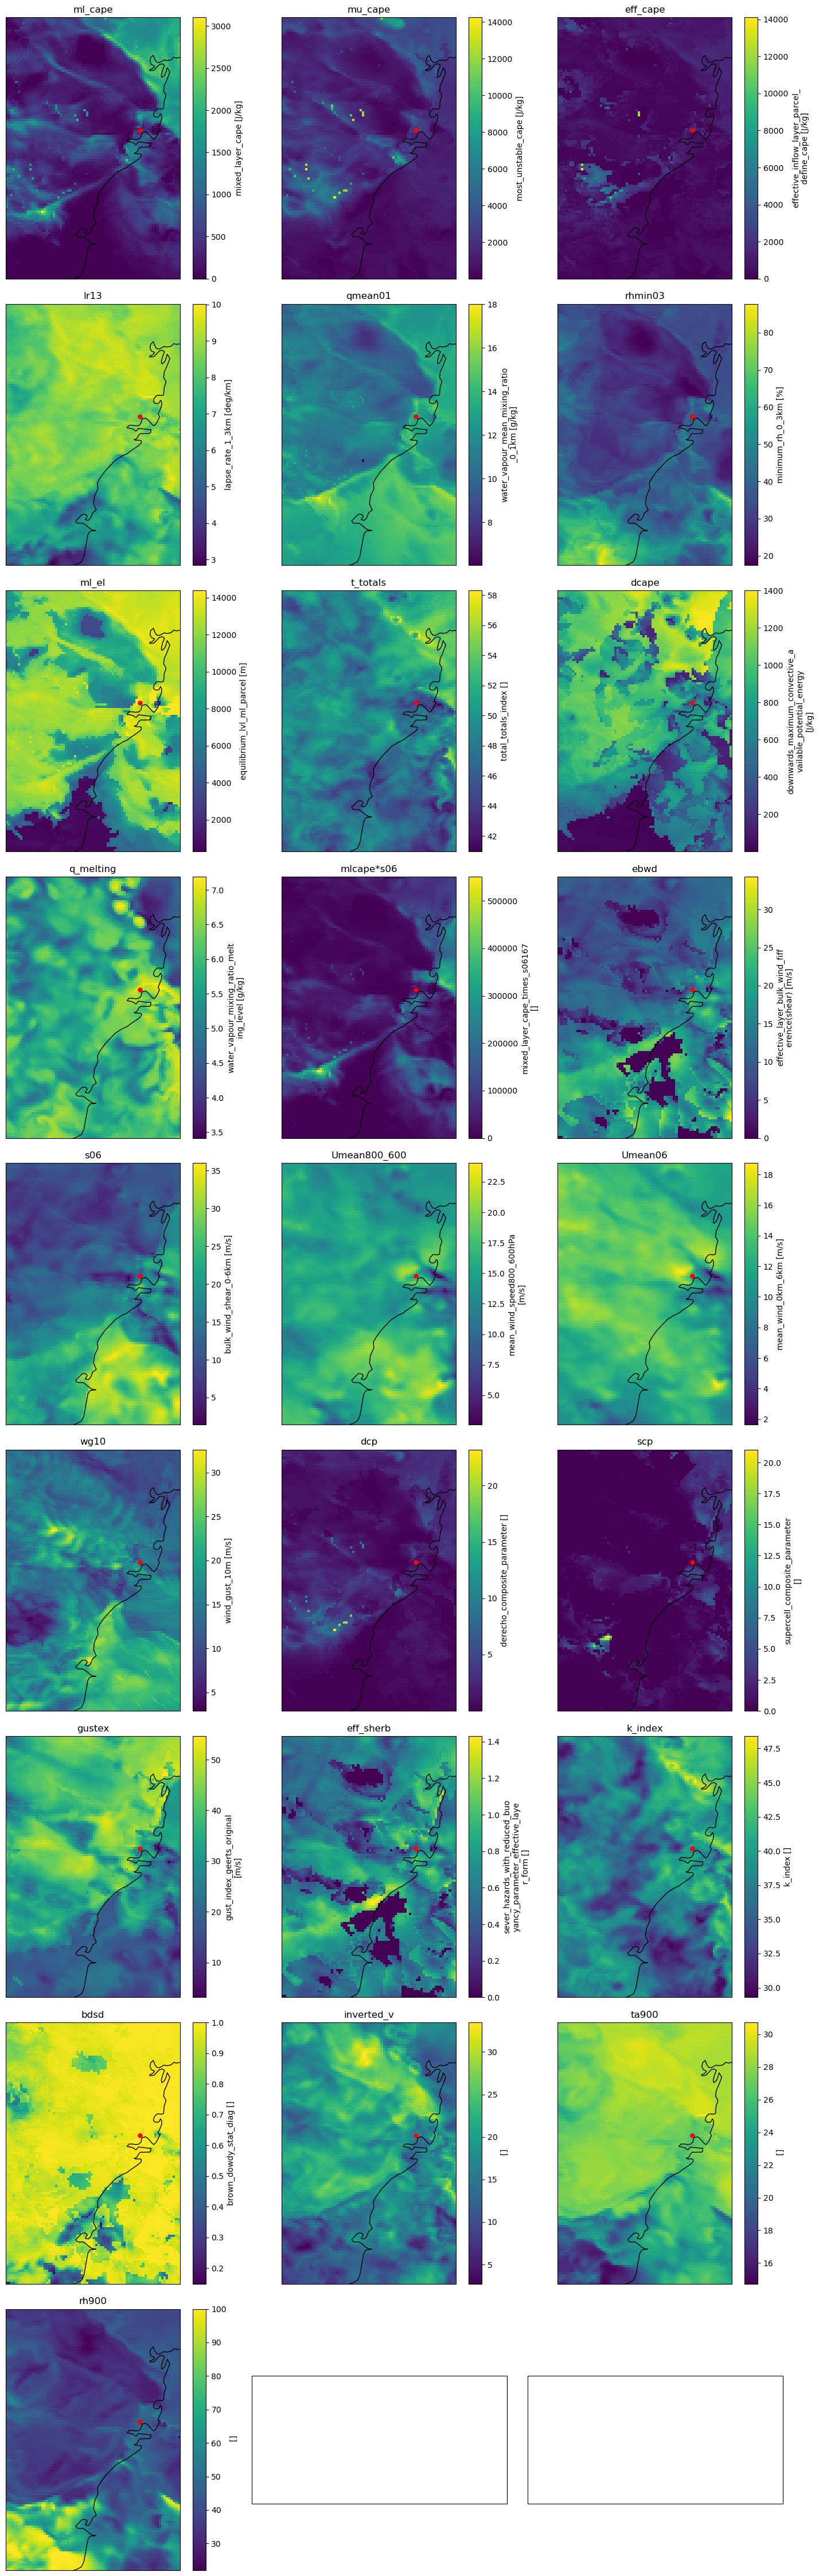

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming your dataset is named ds

# Define the list of variable names you want to plot
variable_names = ['ml_cape', 'mu_cape', 'eff_cape', 'lr13', 'qmean01', 
                  'rhmin03', 'ml_el', 't_totals', 'dcape', 'q_melting', 
                  'mlcape*s06', 'ebwd', 's06', 'Umean800_600', 'Umean06', 
                  'wg10', 'dcp', 'scp', 'gustex', 'eff_sherb', 'k_index', 
                  'bdsd', 'inverted_v', 'ta900', 'rh900']

# Select the variables from the dataset
selected_variables = [var for var in variable_names if var in ss.variables]

# Define the number of rows and columns for subplots
num_rows = len(selected_variables) // 3 + (len(selected_variables) % 3 > 0)
num_cols = min(len(selected_variables), 3)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# Flatten the axs array if it's a 1D array
if num_rows == 1:
    axs = [axs]

# Plot each variable
for i, var in enumerate(selected_variables):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axs[row_idx][col_idx]

    # Plot the variable using xarray's plot method
    ss[var].plot(ax=ax, transform=ccrs.PlateCarree())
    ax.set_title(var)
    
    # Mark a red dot at the specified coordinates
    ax.plot(151.17, -33.95, 'ro', markersize=5, transform=ccrs.PlateCarree())

    # Add coastlines
    ax.coastlines()

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
syindex=sydney_data['time']

In [6]:
df_wa = pd.DataFrame({var_name: wagga_data[var_name] for var_name in variable_names})
df_sy = pd.DataFrame({var_name: sydney_data[var_name] for var_name in variable_names})
df_mo = pd.DataFrame({var_name: moree_data[var_name] for var_name in variable_names})
df_tm = pd.DataFrame({var_name: tamworth_data[var_name] for var_name in variable_names})
df_bd = pd.DataFrame({var_name: badgery_data[var_name] for var_name in variable_names})
df_ri = pd.DataFrame({var_name: richmond_data[var_name] for var_name in variable_names})

In [7]:
riindex=df_ri['time']
bdindex=df_bd['time']
syindex=df_sy['time']
tmindex=df_tm['time']
moindex=df_mo['time']
waindex=df_wa['time']


In [8]:
bda = np.datetime64('2016-01-28T05:00:00.00')
ria = np.datetime64('2001-12-03T02:00:00.00')
sya = np.datetime64('2016-01-14T04:00:00.00')
waa = np.datetime64('2009-01-20T05:00:00.00')
moa = np.datetime64('2015-12-16T08:00:00.00')
tma = np.datetime64('2017-02-17T07:00:00.00')

In [10]:
# bda = np.datetime64('2016-01-28T05:00:00.00')
# ria = np.datetime64('2001-12-03T08:00:00.00')
# sya = np.datetime64('2016-01-14T05:00:00.00')
# waa = np.datetime64('2009-01-20T06:00:00.00')
# moa = np.datetime64('2015-12-16T08:00:00.00')
# tma = np.datetime64('2017-02-17T02:00:00.00')

In [31]:
sydney_data

<xarray.Dataset>
Dimensions:         (time: 145)
Coordinates:
  * time            (time) datetime64[ns] 2016-01-11 ... 2016-01-17
    lat             float32 -33.94
    lon             float32 151.2
Data variables: (12/132)
    ml_cape         (time) float32 ...
    mu_cape         (time) float32 1.152e+03 2.279e+03 3.026e+03 ... 36.38 28.0
    sb_cape         (time) float32 ...
    ml_cin          (time) float32 ...
    sb_cin          (time) float32 ...
    mu_cin          (time) float32 ...
    ...              ...
    ta975           (time) float32 ...
    rh900           (time) float32 ...
    rh850           (time) float32 ...
    sfc_ta          (time) float32 ...
    sfc_dp          (time) float32 ...
    inverted_v      (time) float32 ...

In [9]:
bdlapses = [(i-bda)/np.timedelta64(1, 'h') for i in bdindex]
sylapses = [(i-sya)/np.timedelta64(1, 'h') for i in syindex]
rilapses = [(i-ria)/np.timedelta64(1, 'h') for i in riindex]
molapses = [(i-moa)/np.timedelta64(1, 'h') for i in moindex]
walapses = [(i-waa)/np.timedelta64(1, 'h') for i in waindex]
tmlapses = [(i-tma)/np.timedelta64(1, 'h') for i in tmindex]

In [13]:
# bdlapses_m = [(i-bda)/np.timedelta64(1, 'm') for i in bdindex]
# sylapses_m = [(i-sya)/np.timedelta64(1, 'm') for i in syindex]
# rilapses_m = [(i-ria)/np.timedelta64(1, 'm') for i in riindex]
# molapses_m = [(i-moa)/np.timedelta64(1, 'm') for i in moindex]
# walapses_m = [(i-waa)/np.timedelta64(1, 'm') for i in waindex]
# tmlapses_m = [(i-tma)/np.timedelta64(1, 'm') for i in tmindex]

In [29]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 26,              # Default text size
    "axes.titlesize": 26,         # Axes title
    "axes.labelsize": 26,         # Axes x/y labels
    "xtick.labelsize": 26,        # X tick labels
    "ytick.labelsize": 26,        # Y tick labels
    "legend.fontsize": 15,        # Legend
    "figure.titlesize": 26        # Overall figure title
})

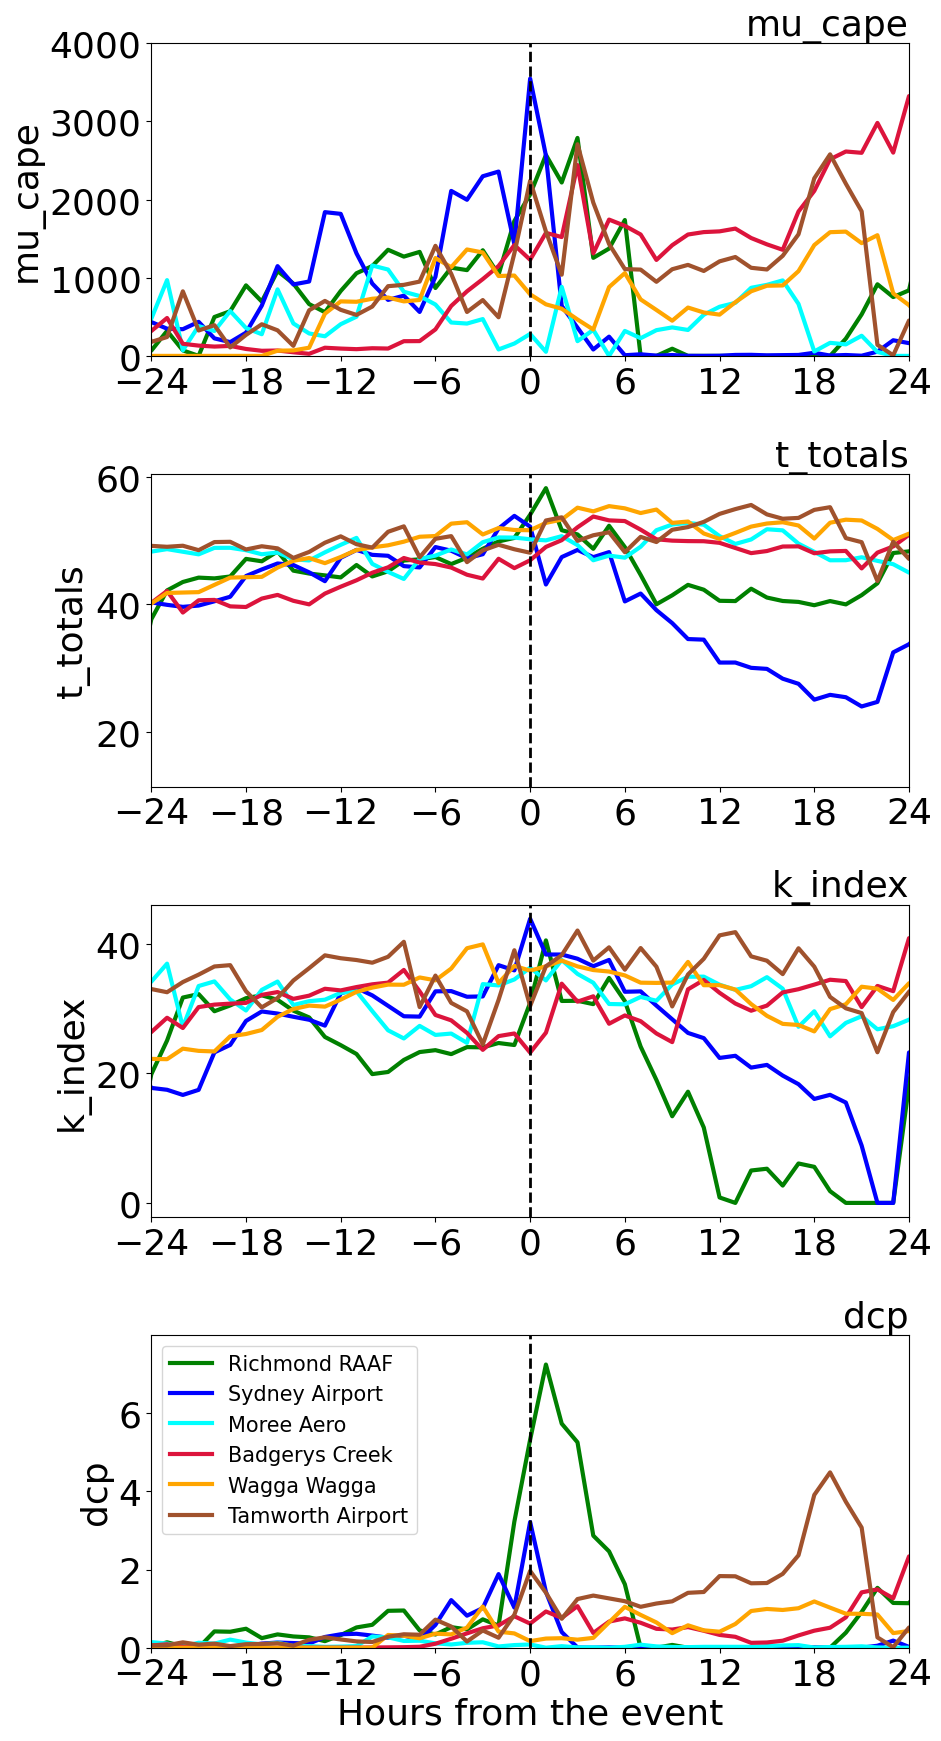

In [33]:
import matplotlib.pyplot as plt
import numpy as np



# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Sydney Airport', 'Moree Aero', 'Badgerys Creek', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Variables to plot
variables_to_plot = ['mu_cape', 't_totals', 'k_index', 'dcp']

# Custom y-limits and y-ticks for specific variables
custom_y_settings = {
    'mu_cape': {'ylim': (0, 4000), 'yticks': np.arange(0, 5000, 1000)},
    'dcp': {'ylim': (0, 8), 'yticks': np.arange(0, 8, 2)}
}

plt.figure(figsize=(10, 18))  # Taller figure for vertical arrangement

for i, variable in enumerate(variables_to_plot, start=1):
    plt.subplot(4, 1, i)  # 4 rows, 1 column
    for dataset, lapse, color in zip(datasets, lapses, colors):
        plt.plot(lapse, dataset[variable], color=color, lw = 3)
    plt.xlim(-24, 24)
    plt.xticks(np.arange(-24, 25, 6))
    plt.axvline(x=0, color="black", ls="--", lw = 2)
    plt.ylabel(variable)
    plt.title(variable, loc='right')

    if variable in custom_y_settings:
        plt.ylim(custom_y_settings[variable]['ylim'])
        plt.yticks(custom_y_settings[variable]['yticks'])

    if i == 4:
        plt.legend(locations, loc='upper left')
        plt.xlabel('Hours from the event')

plt.tight_layout()
plt.show()


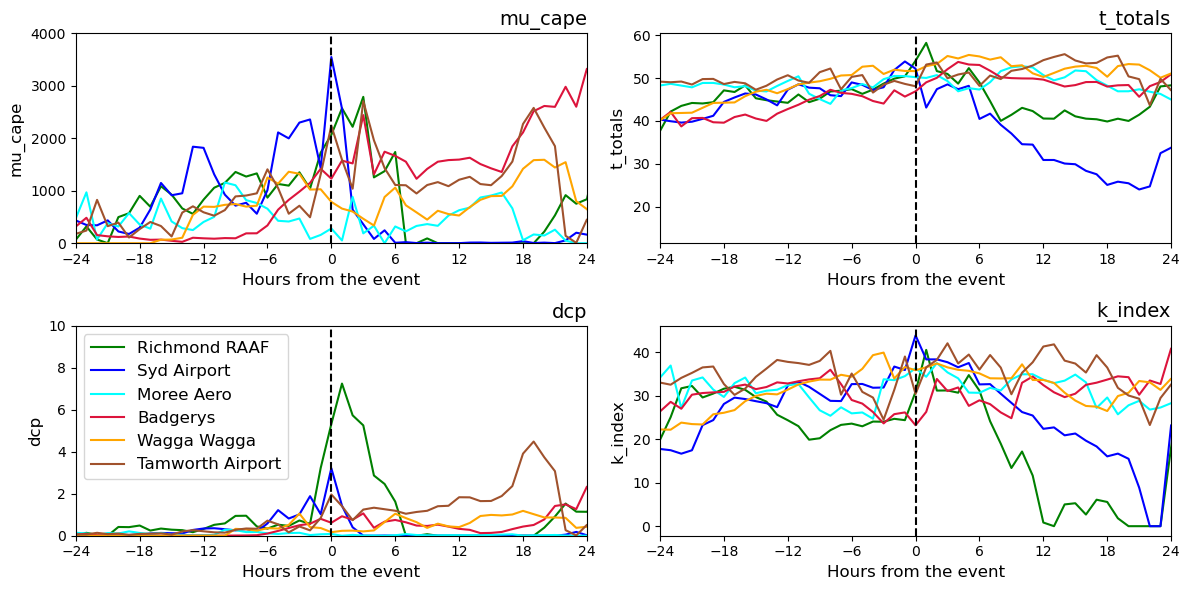

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Define y-limits and y-ticks for specific variables
custom_y_settings = {
    #'ml_cape': {'ylim': (0, 2300), 'yticks': np.arange(0, 2300, 500)},
    'mu_cape': {'ylim': (0, 4000), 'yticks': np.arange(0, 5000, 1000)},
    #'eff_cape': {'ylim': (0, 3000), 'yticks': np.arange(0, 3000, 500)},
    #'dcape': {'ylim': (0, 1500), 'yticks': np.arange(0, 1600, 500)},
   # 'q_melting': {'ylim': (0, 8), 'yticks': np.arange(0, 8.1, 2)},
    #'mlcape*s06': {'ylim': (0, 400000), 'yticks': np.arange(0, 400005, 100000)},
    #'ebwd': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 10)},
    #'s06': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 10)},
    'dcp': {'ylim': (0, 10), 'yticks': np.arange(0, 11, 2)},
    #'scp': {'ylim': (0, 10), 'yticks': np.arange(0, 11, 2)},
    # 'Umean06': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 10)},
    # 'Umean800_600': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 10)}
}


plt.figure(figsize=(12,6))

num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for i, (variable, dataset) in enumerate(zip(datasets[0].columns[1:], datasets[0].columns[1:]), start=1):
    plt.subplot(2, 2, i)
    for dataset, lapse, color in zip(datasets, lapses, colors):
        plt.plot(lapse, dataset[variable], color=color)
    plt.xlabel('Hours from the event', fontsize=12)
    plt.xlim(-24, 24)
    plt.xticks(np.arange(-24, 25, 6))
    plt.axvline(x = 0, color = "black", ls = "--")
    plt.ylabel(variable, fontsize=12)
    plt.title(variable, fontsize=14, loc='right')
    if i == 3:
        plt.legend(locations, loc='upper left', fontsize=12)
    
    # Apply custom y-limits and y-ticks for specific variables
    if variable in custom_y_settings:
        ylim = custom_y_settings[variable]['ylim']
        yticks = custom_y_settings[variable]['yticks']
        plt.ylim(ylim)
        plt.yticks(yticks)

plt.tight_layout()
plt.show()



## Time series for instability parameters

In [14]:
# variable_td = ['time','ml_cape', 'mu_cape', 'eff_cape', 'dcape', 
#                'ta900',  'mlcape*s06', 'lr13', 't_totals', 'k_index', 'inverted_v',
#                    'ml_el',  'dcp', 'eff_sherb', 'bdsd' ]

variable_td = ['time','mu_cape',  'dcape', 
               'ta900',   'lr13', 't_totals', 'k_index', 'inverted_v',
                 'ml_el',  'dcp', 'bdsd' ]


In [15]:
df_wa = pd.DataFrame({var_name: wagga_data[var_name] for var_name in variable_td})
df_sy = pd.DataFrame({var_name: sydney_data[var_name] for var_name in variable_td})
df_mo = pd.DataFrame({var_name: moree_data[var_name] for var_name in variable_td})
df_tm = pd.DataFrame({var_name: tamworth_data[var_name] for var_name in variable_td})
df_bd = pd.DataFrame({var_name: badgery_data[var_name] for var_name in variable_td})
df_ri = pd.DataFrame({var_name: richmond_data[var_name] for var_name in variable_td})

In [16]:
riindex=df_ri['time']
bdindex=df_bd['time']
syindex=df_sy['time']
tmindex=df_tm['time']
moindex=df_mo['time']
waindex=df_wa['time']

In [17]:
bda = np.datetime64('2016-01-28T05:00:00.00')
ria = np.datetime64('2001-12-03T02:00:00.00')
sya = np.datetime64('2016-01-14T04:00:00.00')
waa = np.datetime64('2009-01-20T05:00:00.00')
moa = np.datetime64('2015-12-16T08:00:00.00')
tma = np.datetime64('2017-02-17T07:00:00.00')

In [18]:
# bda = np.datetime64('2016-01-28T05:00:00.00')
# ria = np.datetime64('2001-12-03T08:00:00.00')
# sya = np.datetime64('2016-01-14T05:00:00.00')
# waa = np.datetime64('2009-01-20T06:00:00.00')
# moa = np.datetime64('2015-12-16T08:00:00.00')
# tma = np.datetime64('2017-02-17T02:00:00.00')

In [19]:
bdlapses = [(i-bda)/np.timedelta64(1, 'h') for i in bdindex]
sylapses = [(i-sya)/np.timedelta64(1, 'h') for i in syindex]
rilapses = [(i-ria)/np.timedelta64(1, 'h') for i in riindex]
molapses = [(i-moa)/np.timedelta64(1, 'h') for i in moindex]
walapses = [(i-waa)/np.timedelta64(1, 'h') for i in waindex]
tmlapses = [(i-tma)/np.timedelta64(1, 'h') for i in tmindex]

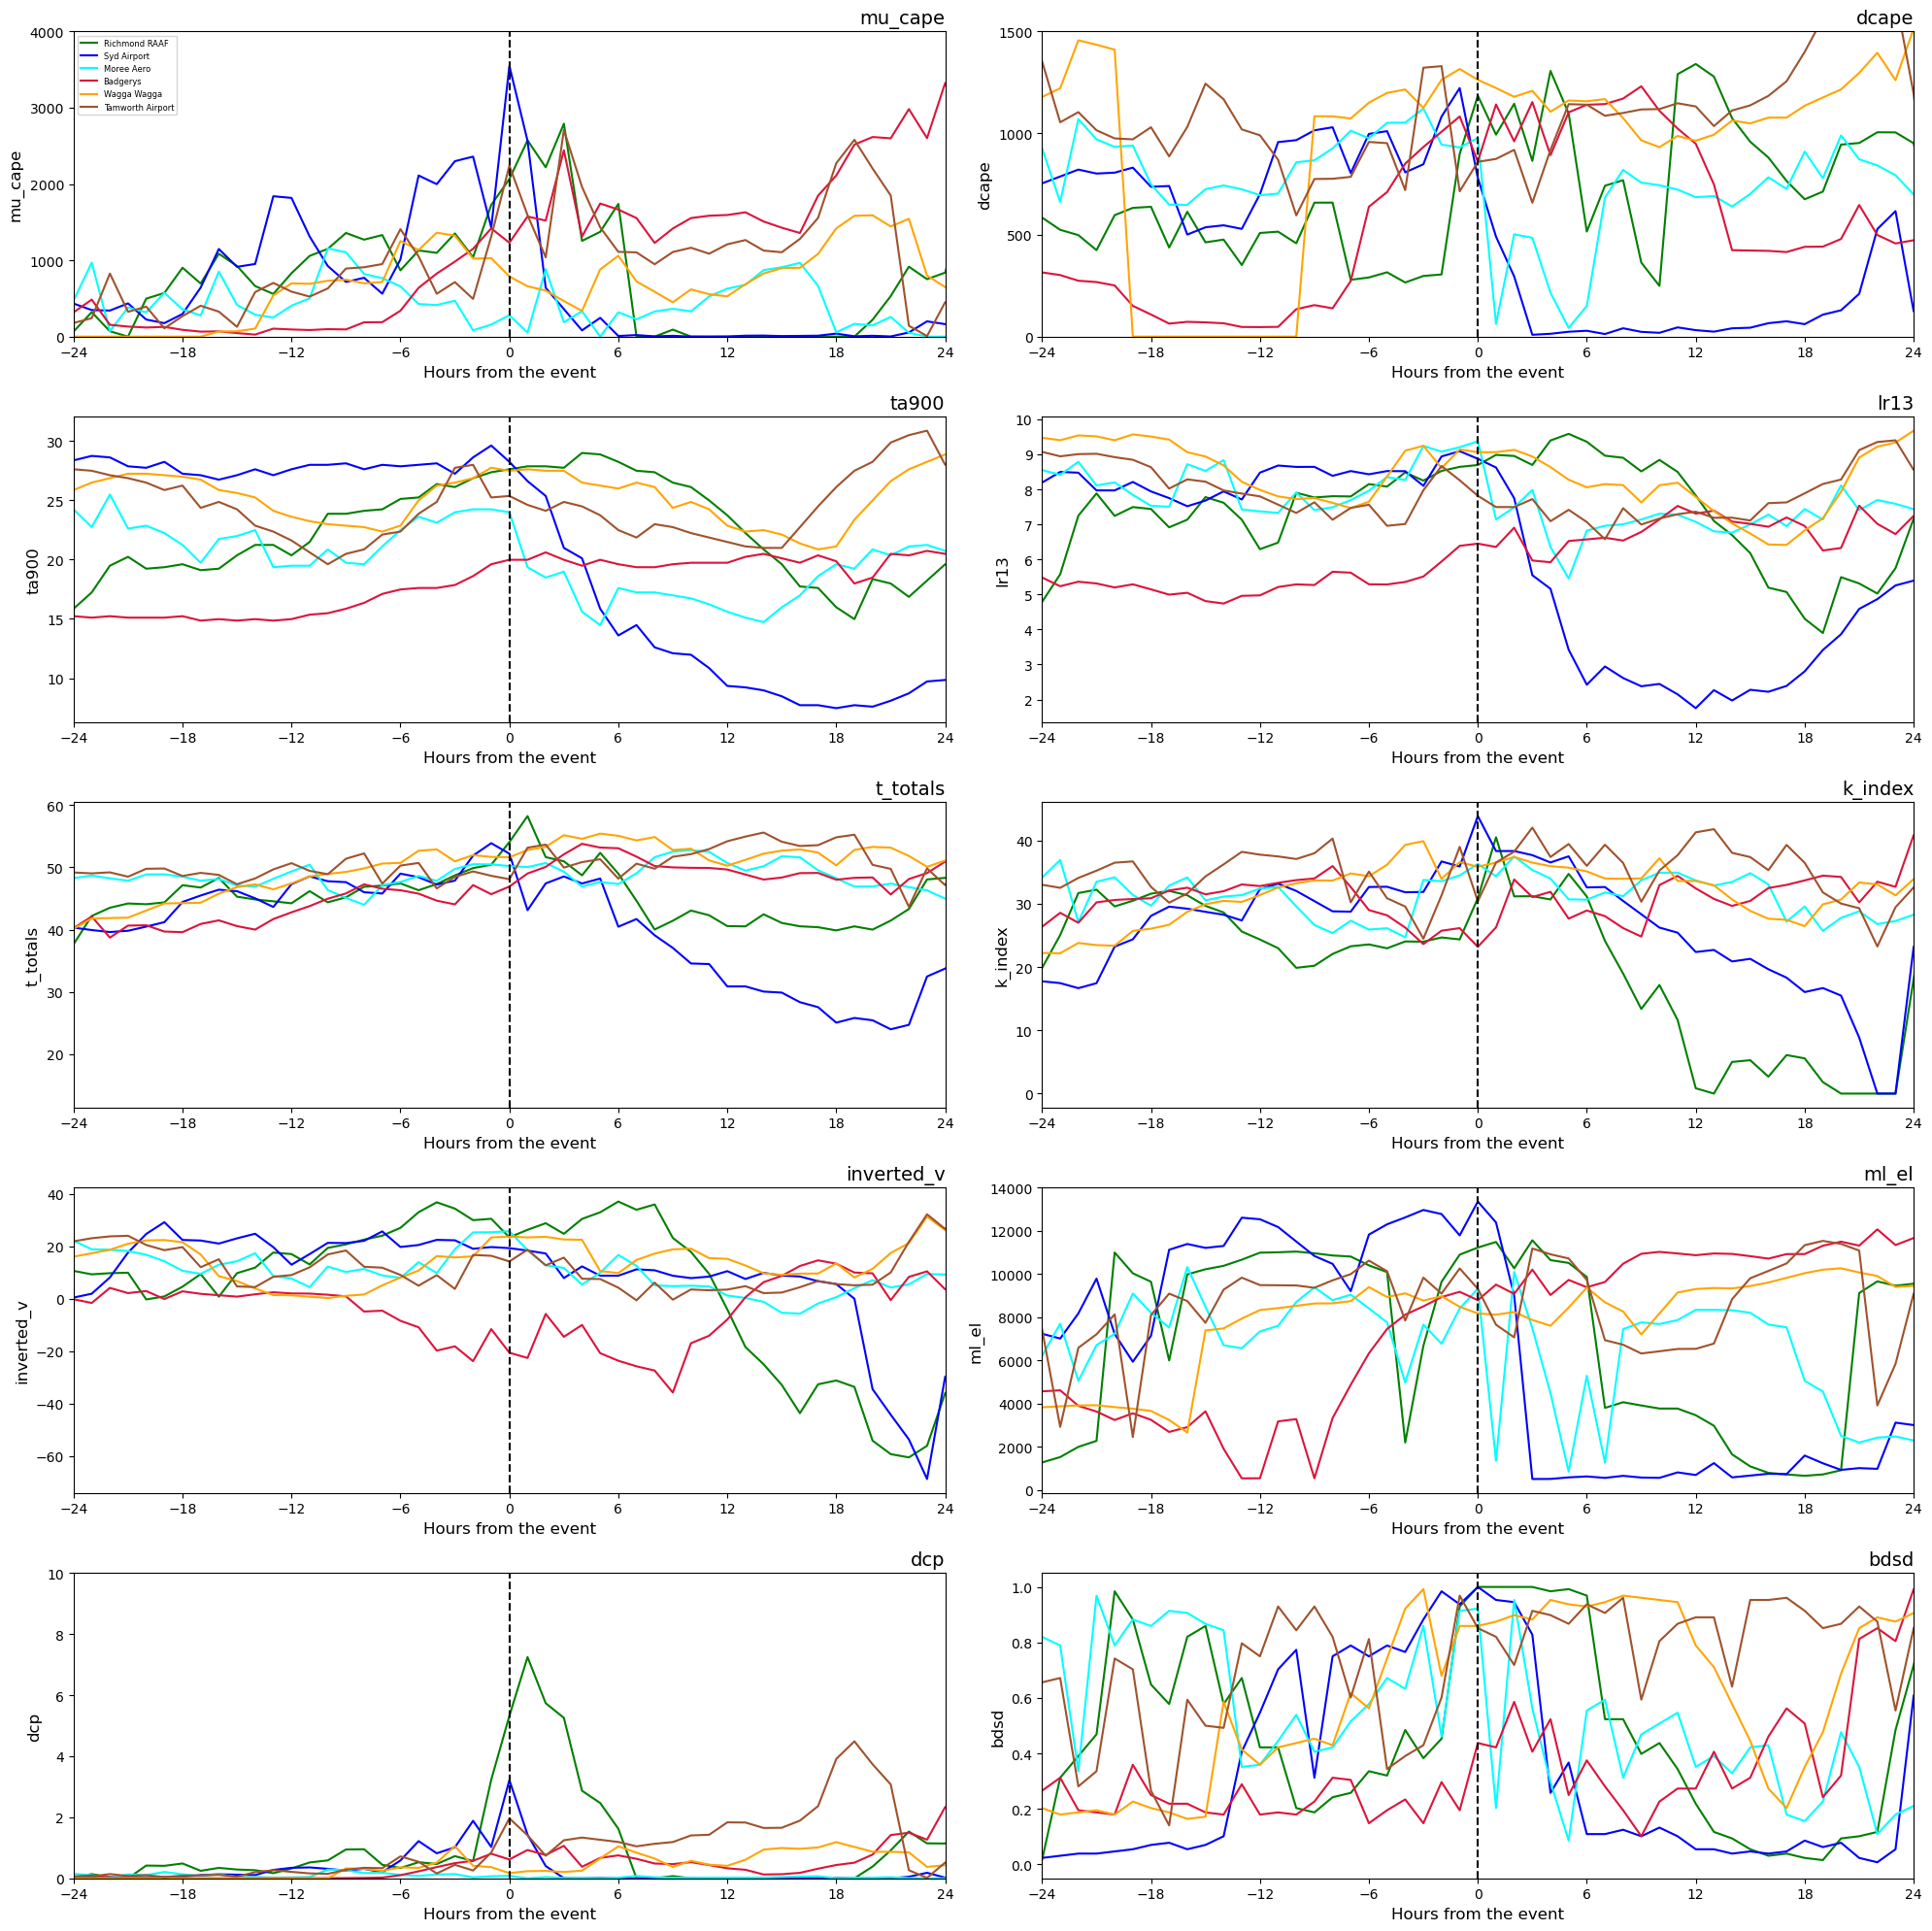

In [20]:

import matplotlib.pyplot as plt
import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Define y-limits and y-ticks for specific variables
custom_y_settings = {
    #'ml_cape': {'ylim': (0, 2300), 'yticks': np.arange(0, 2300, 500)},
    'mu_cape': {'ylim': (0, 4000), 'yticks': np.arange(0, 5000, 1000)},
    #'eff_cape': {'ylim': (0, 3000), 'yticks': np.arange(0, 3000, 500)},
    'dcape': {'ylim': (0, 1500), 'yticks': np.arange(0, 1600, 500)},
    #'mlcape*s06': {'ylim': (0, 400000), 'yticks': np.arange(0, 400005, 100000)},
    'dcp': {'ylim': (0, 10), 'yticks': np.arange(0, 11, 2)},
    #'eff_sherb': {'ylim': (0, 3), 'yticks': np.arange(0, 3.1, 0.5)}


}


plt.figure(figsize=(20,20))
num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for i, (variable, dataset) in enumerate(zip(datasets[0].columns[1:], datasets[0].columns[1:]), start=1):
    plt.subplot((num_variables+1)//2, 2, i)
    for dataset, lapse, color in zip(datasets, lapses, colors):
        plt.plot(lapse, dataset[variable], color=color)
    plt.xlabel('Hours from the event', fontsize=12)
    plt.xlim(-24, 24)
    plt.xticks(np.arange(-24, 25, 6))
    plt.axvline(x = 0, color = "black", ls = "--")
    plt.ylabel(variable, fontsize=12)
    plt.title(variable, fontsize=14, loc='right')
    if i == 1:
        plt.legend(locations, loc='upper left', fontsize=6)
    
    # Apply custom y-limits and y-ticks for specific variables
    if variable in custom_y_settings:
        ylim = custom_y_settings[variable]['ylim']
        yticks = custom_y_settings[variable]['yticks']
        plt.ylim(ylim)
        plt.yticks(yticks)

plt.tight_layout()
plt.show()

THE NEXT CELL IS FOR EXTRACING THE VALUE OF VARIABLES AT TIME t=0. EACH LIST IS FOR EACH STATION.
THE VARIABLE VALUES ARE SAME TO THE ORDER IN VARIABLE_TD

RICHMOND
SYDNEY
MOREE
BADGERYS
WAGGA
TAMWORTH

if variable == 'inverted_v':
        clip_range = (-90, max_value)

In [21]:

import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Create a list to store y values at x=0 for each variable
y_at_x0 = []

num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for variable in datasets[0].columns[1:]:
    y_values_at_x0 = []
    for dataset, lapse in zip(datasets, lapses):
        # Find the index where x=0
        x0_index = np.where(np.array(lapse) == 0)[0][0]
        # Get the y value at x=0
        y_at_x0_value = dataset[variable].iloc[x0_index]
        y_values_at_x0.append(y_at_x0_value)
    y_at_x0.append(np.array(y_values_at_x0))

# Initialize a list to store the values at different positions from each list
positions_values = [[] for _ in range(len(y_at_x0[0]))]

# Iterate over the lists of values for each variable
for values in y_at_x0:
    # Iterate over the values at different positions
    for i, value in enumerate(values):
        # Append the value at each position to the corresponding sublist in 'positions_values'
        positions_values[i].append(value)

# Print the list of values at different positions
for i, values in enumerate(positions_values):
    print(f"{i+1}th values from each list:")
    print(values)


1th values from each list:
[2065.5, 1184.1875, 27.600006, 8.6953125, 54.043945, 30.873047, 23.36089, 11225.8125, 5.325174, 1.0]
2th values from each list:
[3548.375, 779.6875, 28.225006, 8.873047, 52.180664, 43.838867, 19.253288, 13358.0625, 3.217396, 1.0]
3th values from each list:
[280.625, 976.125, 23.975006, 9.374023, 50.20117, 36.29297, 25.695118, 9321.0, 0.08293709, 0.921875]
4th values from each list:
[1230.125, 861.0625, 19.975006, 6.451172, 46.908203, 23.189453, -20.618708, 8786.75, 0.6173986, 0.4375]
5th values from each list:
[788.0, 1262.1875, 27.475006, 9.05957, 51.615234, 35.83496, 23.651434, 8171.5625, 0.16878782, 0.859375]
6th values from each list:
[2241.5, 859.0, 25.350006, 7.8164062, 48.086914, 30.375977, 14.180969, 9314.4375, 1.9654429, 0.8515625]


In [ ]:
r,s,m,b,w,t

In [4]:
import numpy as np

# Define each list
list1 = [2065.5, 1184.1875, 27.600006, 8.6953125, 54.043945, 30.873047, 23.36089, 11225.8125, 5.325174, 1.0]
list2 = [3548.375, 779.6875, 28.225006, 8.873047, 52.180664, 43.838867, 19.253288, 13358.0625, 3.217396, 1.0]
list3 = [280.625, 976.125, 23.975006, 9.374023, 50.20117, 36.29297, 25.695118, 9321.0, 0.08293709, 0.921875]
list4 = [1230.125, 861.0625, 19.975006, 6.451172, 46.908203, 23.189453, -20.618708, 8786.75, 0.6173986, 0.4375]
list5 = [788.0, 1262.1875, 27.475006, 9.05957, 51.615234, 35.83496, 23.651434, 8171.5625, 0.16878782, 0.859375]
list6 = [2241.5, 859.0, 25.350006, 7.8164062, 48.086914, 30.375977, 14.180969, 9314.4375, 1.9654429, 0.8515625]

# Create an array from lists
data = np.array([list1, list2, list3, list4, list5, list6])

# Extract the 2nd, 3rd, 4th, 5th, 6th values from each list
first_values = data[:, 0]
second_values = data[:, 1]  # Second item from each list
third_values = data[:, 2]   # Third item from each list
fourth_values = data[:, 3]  # Fourth item from each list
fifth_values = data[:, 4]   # Fifth item from each list
sixth_values = data[:, 5]   # Sixth item from each list
nineth_values = data[:, 8]

# Print extracted values
print("1st values from each list:", first_values)
# print("2nd values from each list:", second_values)
# print("3rd values from each list:", third_values)
#print("4th values from each list:", fourth_values)
print("5th values from each list:", fifth_values)
#print("6th values from each list:", sixth_values)
print("9th values from each list:", nineth_values)

1st values from each list: [2065.5   3548.375  280.625 1230.125  788.    2241.5  ]
5th values from each list: [54.043945 52.180664 50.20117  46.908203 51.615234 48.086914]
9th values from each list: [5.325174   3.217396   0.08293709 0.6173986  0.16878782 1.9654429 ]


In [ ]:
r,s,m,b,w,t

## Time series for environmental wind speeds and shear

In [22]:
# variable_ws = ['time','ebwd',  's06',  'Umean800_600', 
#                   'Umean06', 'wg10', 'scp',  'gustex' ]

variable_ws = ['time',  's06',  'Umean800_600', 
                  'Umean06', 'wg10','gustex' ]

In [23]:
df_wa = pd.DataFrame({var_name: wagga_data[var_name] for var_name in variable_ws})
df_sy = pd.DataFrame({var_name: sydney_data[var_name] for var_name in variable_ws})
df_mo = pd.DataFrame({var_name: moree_data[var_name] for var_name in variable_ws})
df_tm = pd.DataFrame({var_name: tamworth_data[var_name] for var_name in variable_ws})
df_bd = pd.DataFrame({var_name: badgery_data[var_name] for var_name in variable_ws})
df_ri = pd.DataFrame({var_name: richmond_data[var_name] for var_name in variable_ws})

In [24]:
riindex=df_ri['time']
bdindex=df_bd['time']
syindex=df_sy['time']
tmindex=df_tm['time']
moindex=df_mo['time']
waindex=df_wa['time']

In [25]:
bda = np.datetime64('2016-01-28T05:00:00.00')
ria = np.datetime64('2001-12-03T02:00:00.00')
sya = np.datetime64('2016-01-14T04:00:00.00')
waa = np.datetime64('2009-01-20T05:00:00.00')
moa = np.datetime64('2015-12-16T08:00:00.00')
tma = np.datetime64('2017-02-17T07:00:00.00')

In [26]:
# bda = np.datetime64('2016-01-28T05:00:00.00')
# ria = np.datetime64('2001-12-03T08:00:00.00')
# sya = np.datetime64('2016-01-14T05:00:00.00')
# waa = np.datetime64('2009-01-20T06:00:00.00')
# moa = np.datetime64('2015-12-16T08:00:00.00')
# tma = np.datetime64('2017-02-17T02:00:00.00')

In [27]:
bdlapses = [(i-bda)/np.timedelta64(1, 'h') for i in bdindex]
sylapses = [(i-sya)/np.timedelta64(1, 'h') for i in syindex]
rilapses = [(i-ria)/np.timedelta64(1, 'h') for i in riindex]
molapses = [(i-moa)/np.timedelta64(1, 'h') for i in moindex]
walapses = [(i-waa)/np.timedelta64(1, 'h') for i in waindex]
tmlapses = [(i-tma)/np.timedelta64(1, 'h') for i in tmindex]

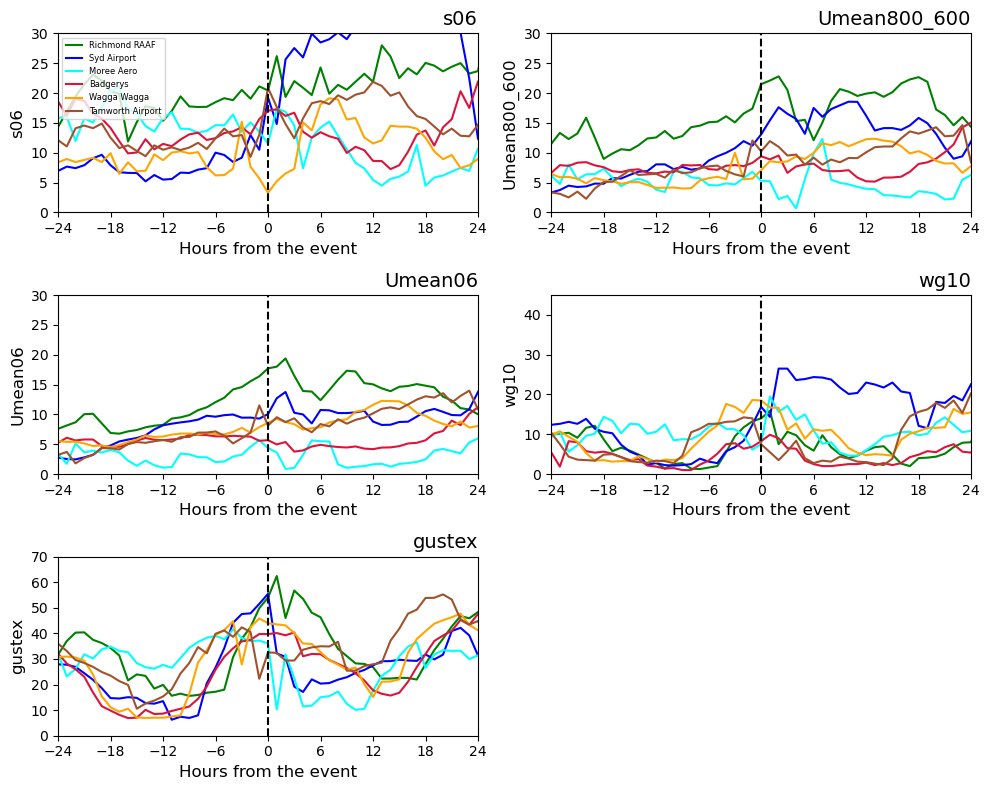

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Define y-limits and y-ticks for specific variables
custom_y_settings = {
  
    #'ebwd': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 5)},
    's06': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 5)},
    'wg10': {'ylim': (0, 45), 'yticks': np.arange(0, 46, 10)},
    #'scp': {'ylim': (0, 10), 'yticks': np.arange(0, 11, 2)},
    'Umean06': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 5)},
    'Umean800_600': {'ylim': (0, 30), 'yticks': np.arange(0, 31, 5)},
    'gustex': {'ylim': (0, 70), 'yticks': np.arange(0, 71, 10)}


}


plt.figure(figsize=(10,8))
num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for i, (variable, dataset) in enumerate(zip(datasets[0].columns[1:], datasets[0].columns[1:]), start=1):
    plt.subplot((num_variables+1)//2, 2, i)
    for dataset, lapse, color in zip(datasets, lapses, colors):
        plt.plot(lapse, dataset[variable], color=color)
    plt.xlabel('Hours from the event', fontsize=12)
    plt.xlim(-24, 24)
    plt.xticks(np.arange(-24, 25, 6))
    plt.axvline(x = 0, color = "black", ls = "--")
    plt.ylabel(variable, fontsize=12)
    plt.title(variable, fontsize=14, loc='right')
    if i == 1:
        plt.legend(locations, loc='upper left', fontsize=6)
    
    # Apply custom y-limits and y-ticks for specific variables
    if variable in custom_y_settings:
        ylim = custom_y_settings[variable]['ylim']
        yticks = custom_y_settings[variable]['yticks']
        plt.ylim(ylim)
        plt.yticks(yticks)

plt.tight_layout()
plt.show()

In [29]:
import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Create a list to store y values at x=0 for each variable
y_at_x0 = []

num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for variable in datasets[0].columns[1:]:
    y_values_at_x0 = []
    for dataset, lapse in zip(datasets, lapses):
        # Find the index where x=0
        x0_index = np.where(np.array(lapse) == 0)[0][0]
        # Get the y value at x=0
        y_at_x0_value = dataset[variable].iloc[x0_index]
        y_values_at_x0.append(y_at_x0_value)
    y_at_x0.append(np.array(y_values_at_x0))

# Initialize a list to store the values at different positions from each list
positions_values = [[] for _ in range(len(y_at_x0[0]))]

# Iterate over the lists of values for each variable
for values in y_at_x0:
    # Iterate over the values at different positions
    for i, value in enumerate(values):
        # Append the value at each position to the corresponding sublist in 'positions_values'
        positions_values[i].append(value)

# Print the list of values at different positions
for i, values in enumerate(positions_values):
    print(f"{i+1}th values from each list:")
    print(values)


1th values from each list:
[20.421875, 21.484375, 17.695312, 14.0, 53.999023]
2th values from each list:
[19.203125, 13.0625, 10.0546875, 16.875, 55.467773]
3th values from each list:
[11.5234375, 5.28125, 4.359375, 7.5, 36.04883]
4th values from each list:
[17.039062, 9.3984375, 5.6796875, 8.25, 39.742188]
5th values from each list:
[3.28125, 7.0625, 8.59375, 18.5, 43.97461]
6th values from each list:
[20.851562, 10.234375, 8.125, 7.5, 32.592773]


## Time series for Moisture parameters

In [30]:
variable_mp = ['time', 'rh900', 'rhmin03', 'qmean01', 'q_melting' ]



In [31]:
df_wa = pd.DataFrame({var_name: wagga_data[var_name] for var_name in variable_mp})
df_sy = pd.DataFrame({var_name: sydney_data[var_name] for var_name in variable_mp})
df_mo = pd.DataFrame({var_name: moree_data[var_name] for var_name in variable_mp})
df_tm = pd.DataFrame({var_name: tamworth_data[var_name] for var_name in variable_mp})
df_bd = pd.DataFrame({var_name: badgery_data[var_name] for var_name in variable_mp})
df_ri = pd.DataFrame({var_name: richmond_data[var_name] for var_name in variable_mp})

In [32]:
riindex=df_ri['time']
bdindex=df_bd['time']
syindex=df_sy['time']
tmindex=df_tm['time']
moindex=df_mo['time']
waindex=df_wa['time']

In [33]:
bda = np.datetime64('2016-01-28T05:00:00.00')
ria = np.datetime64('2001-12-03T02:00:00.00')
sya = np.datetime64('2016-01-14T04:00:00.00')
waa = np.datetime64('2009-01-20T05:00:00.00')
moa = np.datetime64('2015-12-16T08:00:00.00')
tma = np.datetime64('2017-02-17T07:00:00.00')

In [34]:
# bda = np.datetime64('2016-01-28T05:00:00.00')
# ria = np.datetime64('2001-12-03T08:00:00.00')
# sya = np.datetime64('2016-01-14T05:00:00.00')
# waa = np.datetime64('2009-01-20T06:00:00.00')
# moa = np.datetime64('2015-12-16T08:00:00.00')
# tma = np.datetime64('2017-02-17T02:00:00.00')

In [35]:
bdlapses = [(i-bda)/np.timedelta64(1, 'h') for i in bdindex]
sylapses = [(i-sya)/np.timedelta64(1, 'h') for i in syindex]
rilapses = [(i-ria)/np.timedelta64(1, 'h') for i in riindex]
molapses = [(i-moa)/np.timedelta64(1, 'h') for i in moindex]
walapses = [(i-waa)/np.timedelta64(1, 'h') for i in waindex]
tmlapses = [(i-tma)/np.timedelta64(1, 'h') for i in tmindex]

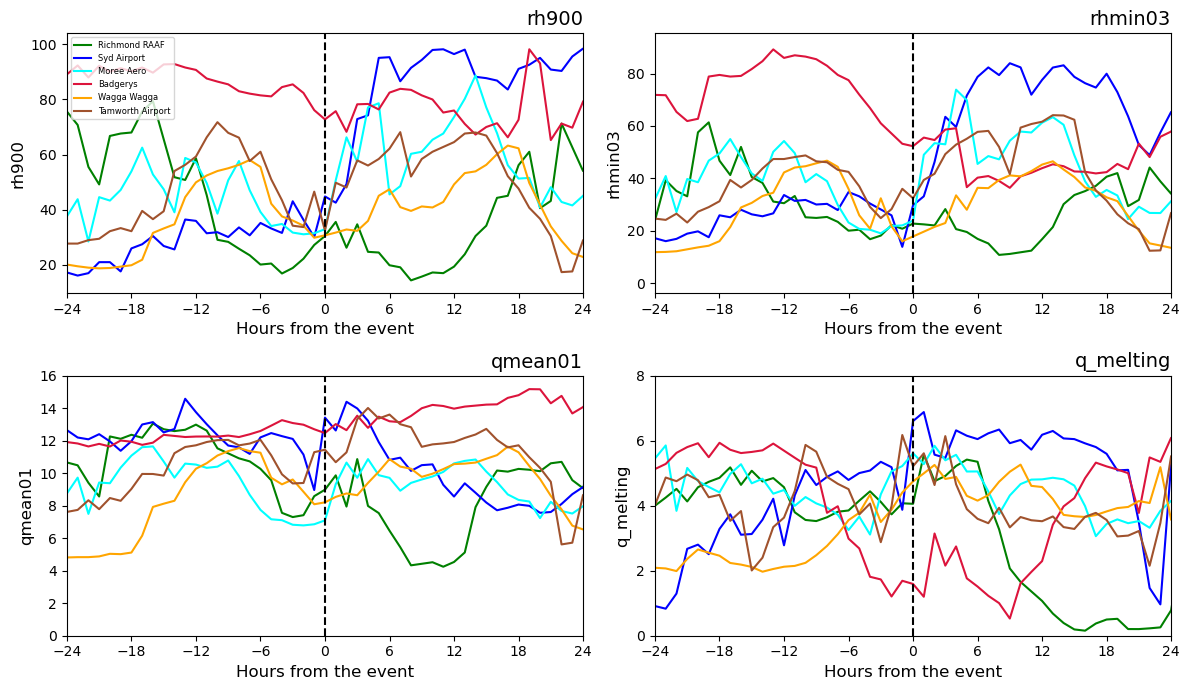

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Define y-limits and y-ticks for specific variables
custom_y_settings = {
  'q_melting': {'ylim': (0, 8), 'yticks': np.arange(0, 8.1, 2)},
  'qmean01': {'ylim': (0, 16), 'yticks': np.arange(0, 16.1, 2)}
}


plt.figure(figsize=(12,7))
num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for i, (variable, dataset) in enumerate(zip(datasets[0].columns[1:], datasets[0].columns[1:]), start=1):
    plt.subplot((num_variables+1)//2, 2, i)
    for dataset, lapse, color in zip(datasets, lapses, colors):
        plt.plot(lapse, dataset[variable], color=color)
    plt.xlabel('Hours from the event', fontsize=12)
    plt.xlim(-24, 24)
    plt.xticks(np.arange(-24, 25, 6))
    plt.axvline(x = 0, color = "black", ls = "--")
    plt.ylabel(variable, fontsize=12)
    plt.title(variable, fontsize=14, loc='right')
    if i == 1:
        plt.legend(locations, loc='upper left', fontsize=6)
    
    # Apply custom y-limits and y-ticks for specific variables
    if variable in custom_y_settings:
        ylim = custom_y_settings[variable]['ylim']
        yticks = custom_y_settings[variable]['yticks']
        plt.ylim(ylim)
        plt.yticks(yticks)

plt.tight_layout()
plt.show()

In [38]:
import numpy as np

# Define your datasets and colors here
datasets = [df_ri, df_sy, df_mo, df_bd, df_wa, df_tm]
locations = ['Richmond RAAF', 'Syd Airport', 'Moree Aero', 'Badgerys', 'Wagga Wagga', 'Tamworth Airport']
colors = ['green', 'blue', 'cyan', 'crimson', 'orange', 'sienna']
lapses = [rilapses, sylapses, molapses, bdlapses, walapses, tmlapses]

# Create a list to store y values at x=0 for each variable
y_at_x0 = []

num_variables = len(datasets[0].columns) - 1  # Excluding the first column (time)

for variable in datasets[0].columns[1:]:
    y_values_at_x0 = []
    for dataset, lapse in zip(datasets, lapses):
        # Find the index where x=0
        x0_index = np.where(np.array(lapse) == 0)[0][0]
        # Get the y value at x=0
        y_at_x0_value = dataset[variable].iloc[x0_index]
        y_values_at_x0.append(y_at_x0_value)
    y_at_x0.append(np.array(y_values_at_x0))

# Initialize a list to store the values at different positions from each list
positions_values = [[] for _ in range(len(y_at_x0[0]))]

# Iterate over the lists of values for each variable
for values in y_at_x0:
    # Iterate over the values at different positions
    for i, value in enumerate(values):
        # Append the value at each position to the corresponding sublist in 'positions_values'
        positions_values[i].append(value)

# Print the list of values at different positions
for i, values in enumerate(positions_values):
    print(f"{i+1}th values from each list:")
    print(values)


1th values from each list:
[30.375, 22.710938, 8.990234, 4.060547]
2th values from each list:
[44.74999, 29.726562, 13.427734, 6.607422]
3th values from each list:
[32.875004, 23.827148, 7.1015625, 5.6152344]
4th values from each list:
[72.75, 52.274414, 12.474609, 1.59375]
5th values from each list:
[30.625004, 17.77539, 8.2109375, 4.7490234]
6th values from each list:
[32.374992, 32.375, 11.452148, 5.2158203]


## wg10 for for each station, for every lat and lon, for diff timesteps.

In [1]:
import xarray as xr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import metpy
import glob
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import time

In [2]:
richmond_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW-analysis/read_model_data/data/Richmond/barra_sy_20011130_20011206.nc')
sydney_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW-analysis/read_model_data/data/Sydney/barra_sy_20160111_20160117.nc')
badgery_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW-analysis/read_model_data/data/Badgery/barra_sy_20160125_20160131.nc')
wagga_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW-analysis/read_model_data/data/Wagga/barra_sy_20090117_20090123.nc')
moree_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW-analysis/read_model_data/data/Moree/barra_sy_20151213_20151219.nc')
tamworth_data_1 = xr.open_dataset('/g/data/up6/gs5098/SCW-analysis/read_model_data/data/Tamworth/barra_sy_20170214_20170220.nc')


0.3.0


In [3]:
bd_time_to_highlight_dt = np.datetime64('2016-01-28T05:00:00.00')
ri_time_to_highlight_dt = np.datetime64('2001-12-03T02:00:00.00')
sy_time_to_highlight_dt = np.datetime64('2016-01-14T04:00:00.00')
wa_time_to_highlight_dt = np.datetime64('2009-01-20T05:00:00.00')
mo_time_to_highlight_dt = np.datetime64('2015-12-16T08:00:00.00')
tm_time_to_highlight_dt = np.datetime64('2017-02-17T07:00:00.00')

In [4]:
bda = np.datetime64('2016-01-28T05:00:00.00')
ria = np.datetime64('2001-12-03T08:00:00.00')
sya = np.datetime64('2016-01-14T05:00:00.00')
waa = np.datetime64('2009-01-20T06:00:00.00')
moa = np.datetime64('2015-12-16T08:00:00.00')
tma = np.datetime64('2017-02-17T02:00:00.00')

In [5]:
riindex=richmond_data_1['time']
bdindex=badgery_data_1['time']
syindex=sydney_data_1['time']
tmindex=tamworth_data_1['time']
moindex=moree_data_1['time']
waindex=wagga_data_1['time']

In [6]:
bdlapses_2 = [(i-bda)/np.timedelta64(1, 'h') for i in bdindex]
sylapses_2 = [(i-sya)/np.timedelta64(1, 'h') for i in syindex]
rilapses_2 = [(i-ria)/np.timedelta64(1, 'h') for i in riindex]
molapses_2 = [(i-moa)/np.timedelta64(1, 'h') for i in moindex]
walapses_2 = [(i-waa)/np.timedelta64(1, 'h') for i in waindex]
tmlapses_2 = [(i-tma)/np.timedelta64(1, 'h') for i in tmindex]

In [7]:
bdlapses = [(i-bd_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in bdindex]
sylapses = [(i-sy_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in syindex]
rilapses = [(i-ri_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in riindex]
molapses = [(i-mo_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in moindex]
walapses = [(i-wa_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in waindex]
tmlapses = [(i-tm_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in tmindex]

In [8]:

# Define the time range you want to slice

# start_time = '2016-01-13T22:00:00.00'   # specify the start time
# end_time = '2016-01-14T10:00:00.00'   # specify the end time
# start_time = '2001-12-02T20:00:00.00'   # specify the start time
# end_time = '2001-12-03T09:00:00.00' 
# start_time = '2016-01-27T23:00:00.00'   # specify the start time
# end_time = '2016-01-28T11:00:00.00' 
# start_time = '2009-01-19T23:00:00.00'   # specify the start time
# end_time = '2009-01-20T11:00:00.00'
# start_time = '2017-02-17T01:00:00.00'   # specify the start time
# end_time = '2017-02-17T13:00:00.00'
start_time = '2015-12-16T02:00:00.00'   # specify the start time
end_time = '2015-12-16T14:00:00.00'
# Slice the dataset for the specified time range
moree_data_3 = moree_data_1.sel(time=slice(start_time, end_time))

In [9]:
import xarray as xr
import numpy as np

# Assuming your dataset is named 'ds' and wind speed variable is named 'wind_speed'
# For example:
# ds = xr.open_dataset('your_data.nc')

# Find the maximum wind speed value and its corresponding coordinates
max_wind_speed = moree_data_3.wg10.max(dim='time')  # Maximum wind speed over all time steps

# Convert max_wind_speed to numpy array
max_wind_speed_np = max_wind_speed.values

# Find the index of the maximum wind speed value
max_wind_speed_index = np.unravel_index(np.argmax(max_wind_speed_np), max_wind_speed_np.shape)

# Extract latitude, longitude, and time step associated with the maximum wind speed value
max_lat = moree_data_3['lat'].values[max_wind_speed_index[0]]
max_lon = moree_data_3['lon'].values[max_wind_speed_index[1]]

# Find the maximum wind speed value
max_wind_speed_value = max_wind_speed.values[max_wind_speed_index]



print("Maximum wind speed coordinates:")
print("Maximum wind speed value:", max_wind_speed_value)
print("Latitude:", max_lat)
print("Longitude:", max_lon)


Maximum wind speed coordinates:
Maximum wind speed value: 35.75
Latitude: -29.8275
Longitude: 150.04149


In [10]:
sy_gust_new  = moree_data_1.sel(lat = -29.49, lon = 149.85, method = 'nearest')
sy_gust_new_1 = moree_data_1.sel(lat = max_lat, lon = max_lon, method = 'nearest')


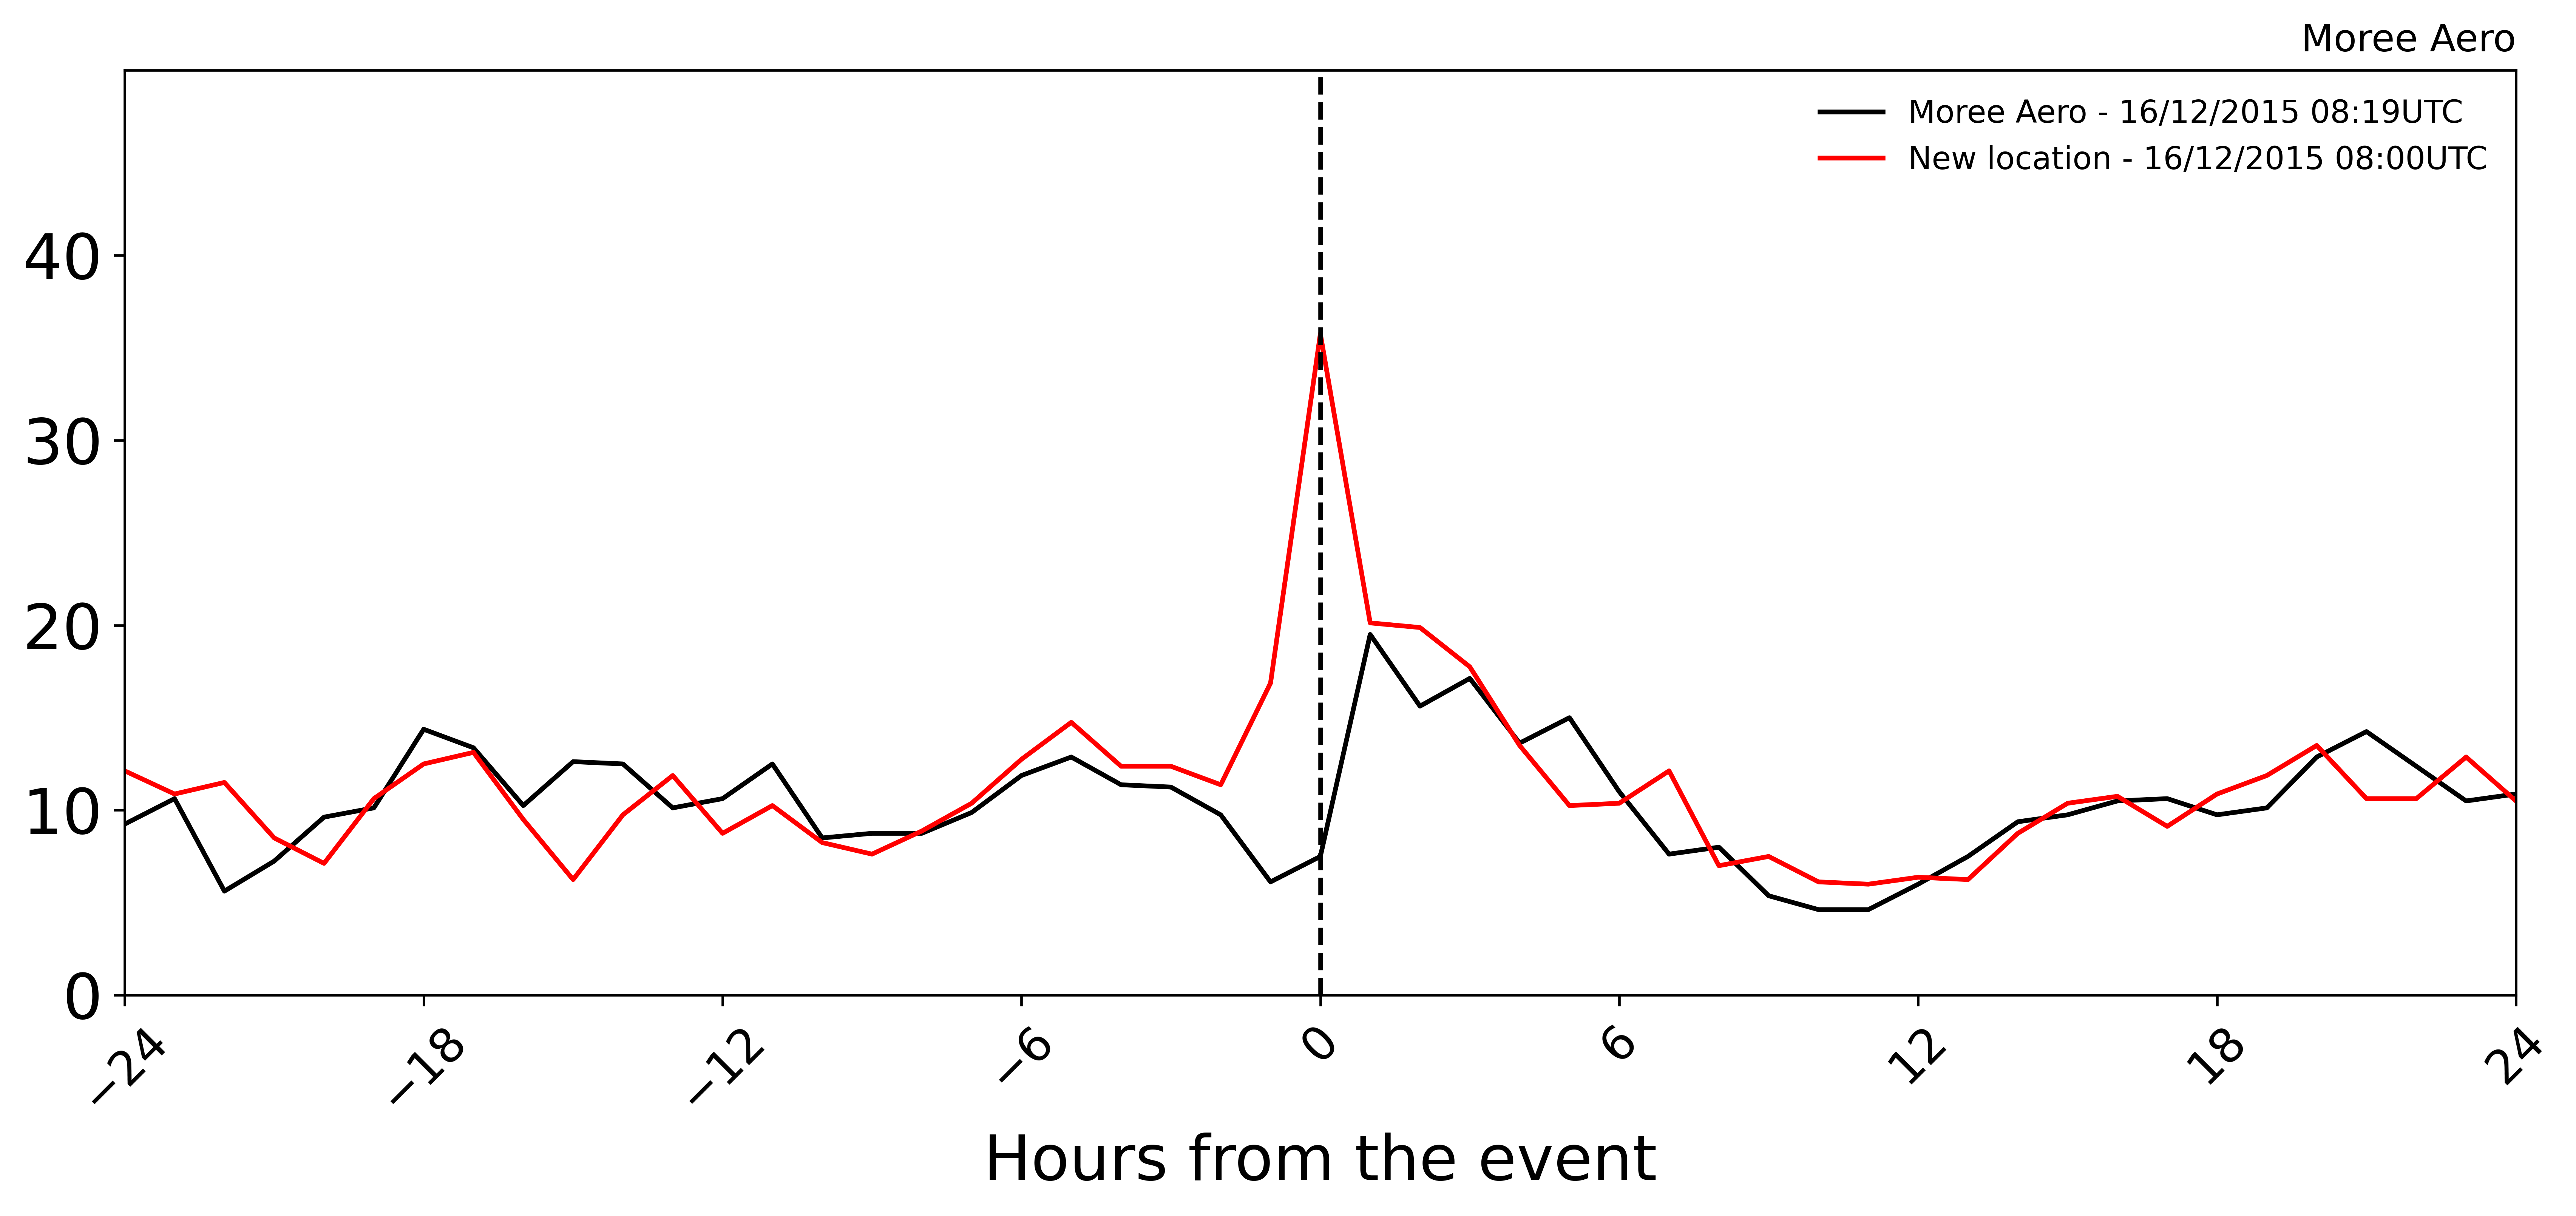

In [12]:
plt.figure()  # create a plot figure

#plt.xlabel('Minutes from the event', fontsize = 10)
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['figure.dpi'] = 600

       # create the first of two panels and set current axis
plt.subplot(1, 1, 1) # (rows, columns, panel number)

plt.plot(molapses, sy_gust_new.wg10, color='black',label='Moree Aero - 16/12/2015 08:19UTC')
plt.plot(molapses_2, sy_gust_new_1.wg10, color='red', label='New location - 16/12/2015 08:00UTC')
# plt.plot(bdlapses, bdiv_3, color='crimson', label='Badgerys Creek')
# plt.plot(molapses, moiv_3, color='cyan', label='Moree Aero')
# plt.plot(tmlapses, tmiv_3, color='sienna', label='Tamworth Airport')
# plt.plot(walapses, waiv_3, color='orange', label='Wagga Wagga Airport')



#plt.ylabel("(Degree Celsius)", fontsize=20)
plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-24,24)
plt.ylim(0,50)
#plt.ylim(0,10,1)
plt.xticks(np.arange(-24,25,6))
plt.yticks(np.arange(0,50,10))
plt.title("Moree Aero", loc = 'right', fontsize = 12)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x',labelsize=15, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")

leg = plt.legend(loc ="upper right", frameon=False, fontsize=10)
#ax1.get_xaxis().set_visible(False)
plt.tight_layout(pad=3.0)

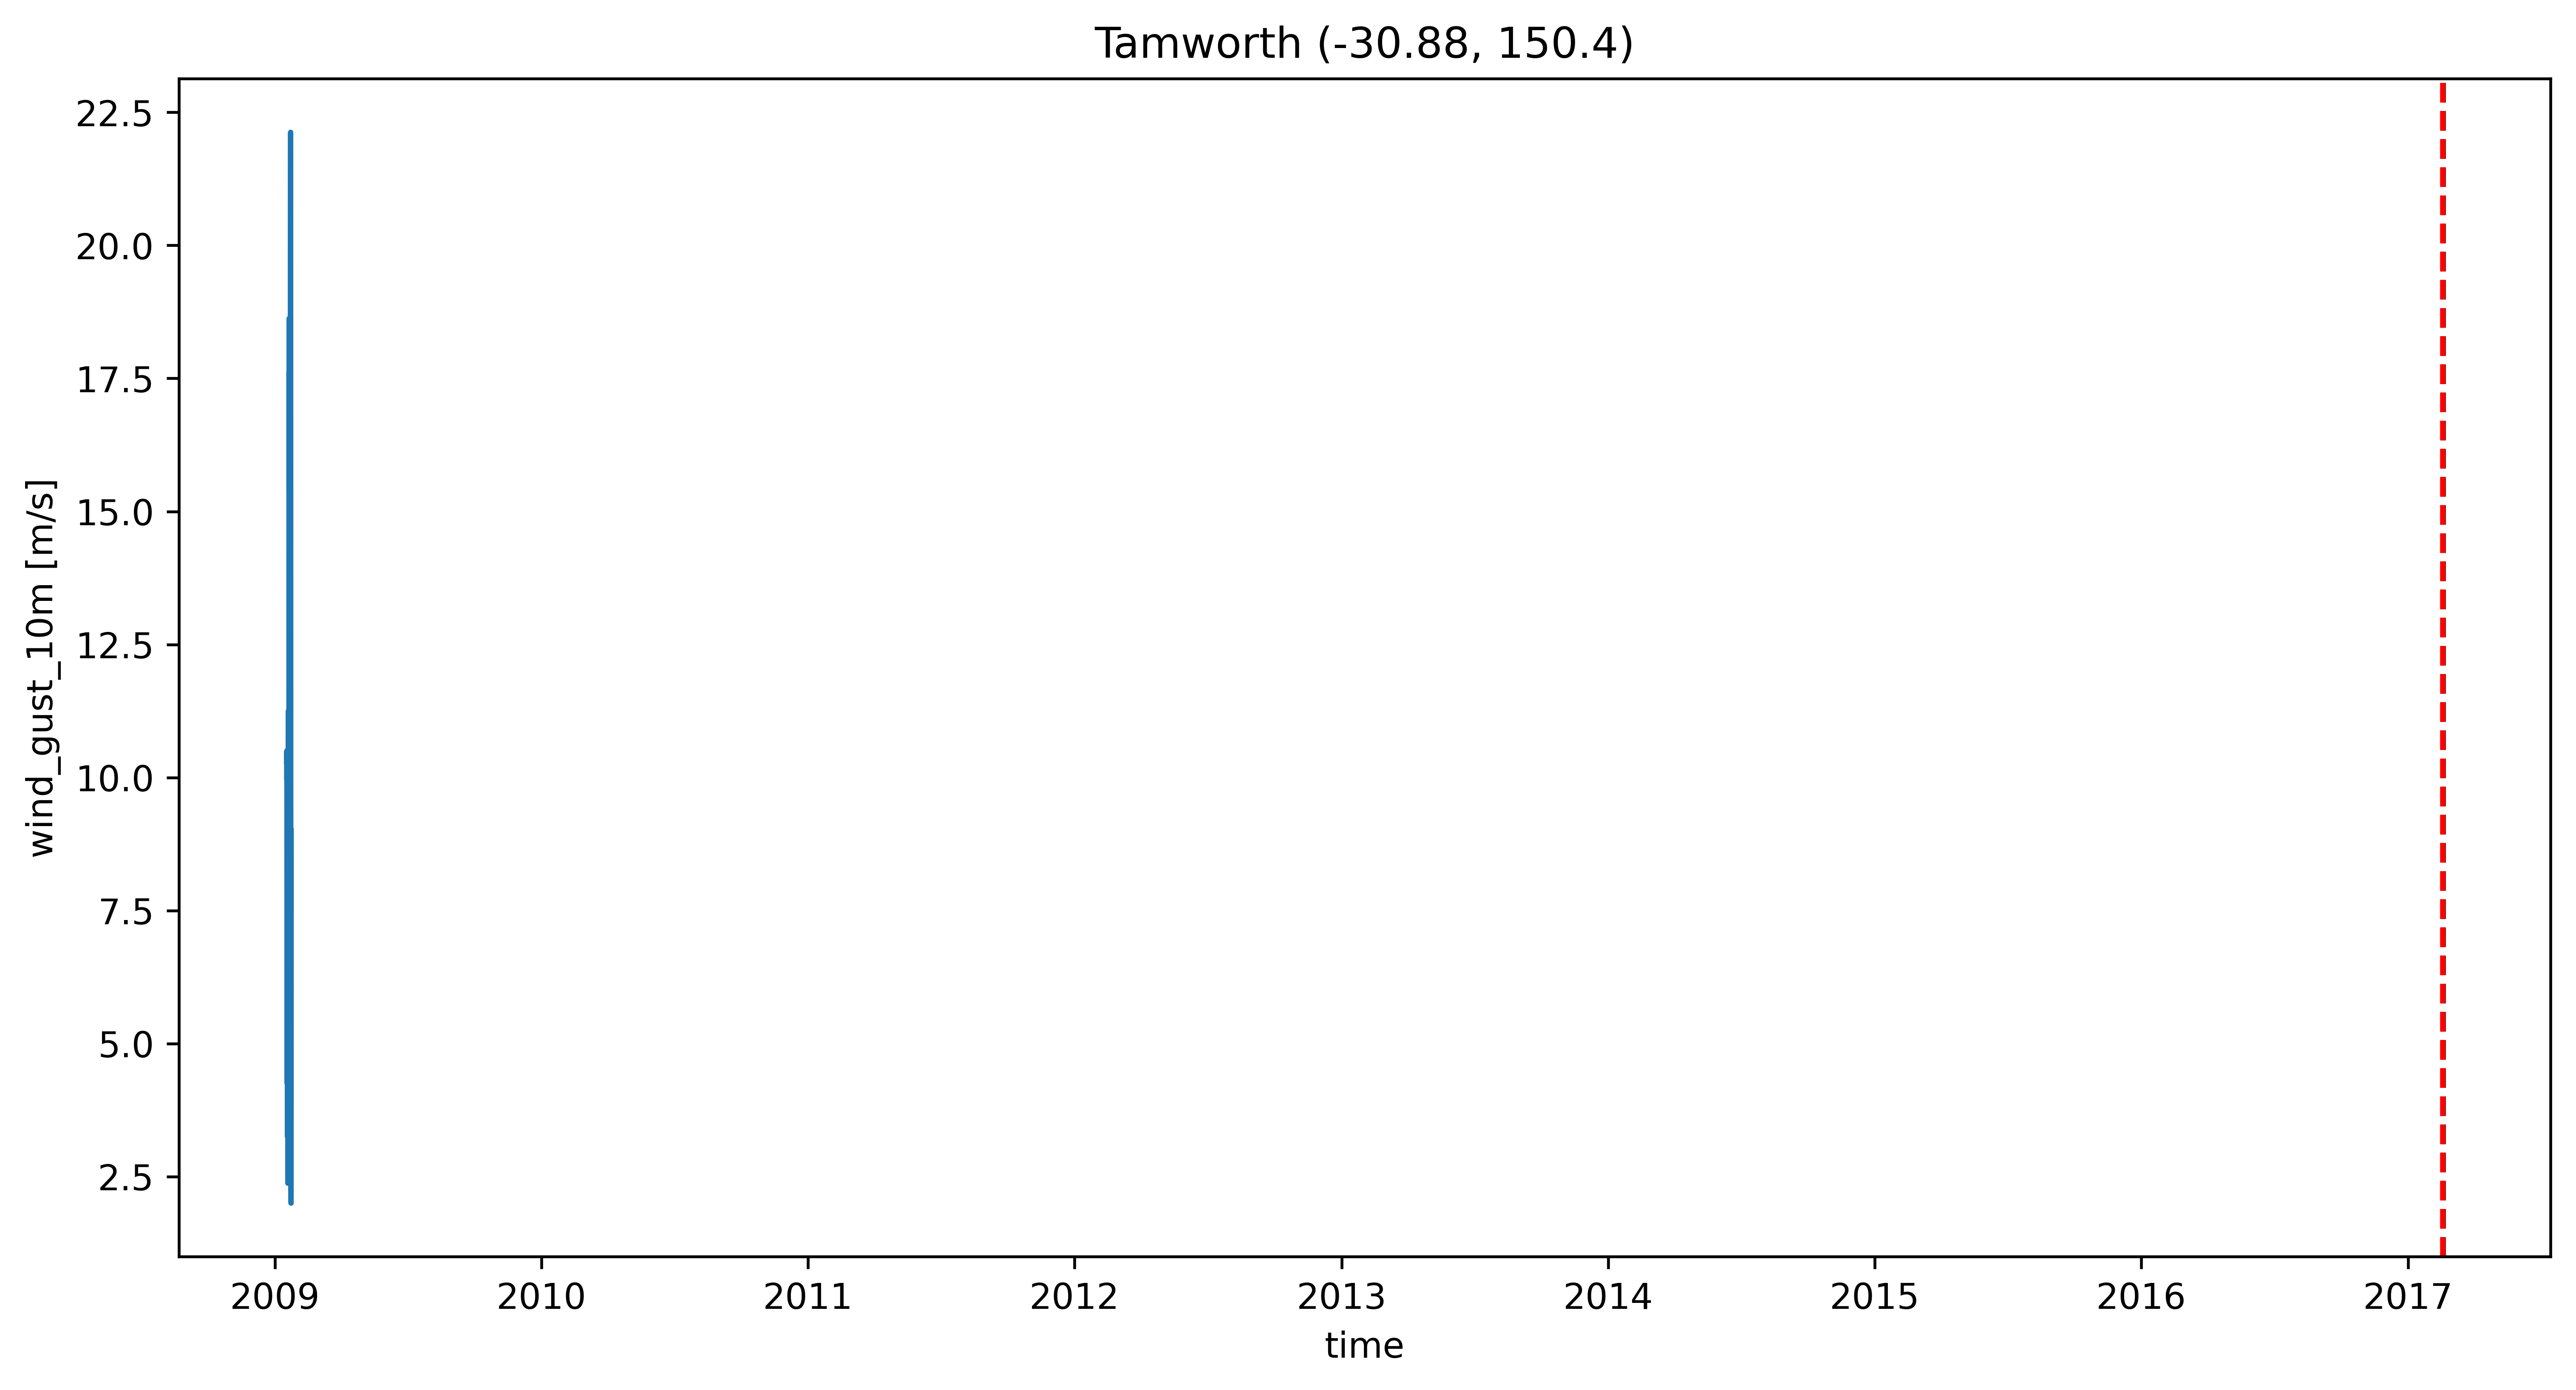

In [12]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

# Assuming sy_gust_new is your xarray dataset
# and you have already plotted a variable named 'wind_speed'

# Plot wind_speed variable
fig, ax = plt.subplots()
sy_gust_new['wg10'].plot(ax=ax)

# Add a vertical line at time = 04:00:00
time_to_highlight = '2017-02-17T07:00:00.000000000'
time_to_highlight_dt = pd.to_datetime(time_to_highlight)
time_to_highlight_num = date2num(time_to_highlight_dt)
ax.axvline(time_to_highlight_num, color='black', linestyle='--')

time_to_highlight_2 =  '2017-02-17T02:00:00.000000000'
time_to_highlight_dt_2 = pd.to_datetime(time_to_highlight_2)
time_to_highlight_num_2 = date2num(time_to_highlight_dt_2)
ax.axvline(time_to_highlight_num_2, color='red', linestyle='--')

# Show the plot
#plt.title('Syd Apt (-33.37, 150.7)')
#plt.title('Richmond (-33.89, 150.7)')
#plt.title('Badgerys (-33.78, 150.7)')
#plt.title('Wagga wagga (-35.02, 147.9)')
#plt.title('Moree (-29.83, 150.0)')
plt.title('Tamworth (-30.88, 150.4)')
plt.show()



### Wind direction

### Sydney airport

In [1]:
import xarray as xr
import glob
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units

In [2]:
#u and v at surface

sysfcu1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2016/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160113*.nc')
sysfcu2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2016/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160114*.nc')
sysfcu3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2016/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160115*.nc')

sy_day1_su = xr.open_mfdataset(sysfcu1)
sy_day2_su = xr.open_mfdataset(sysfcu2)
sy_day3_su = xr.open_mfdataset(sysfcu3)


sysfcdui = xr.concat([sy_day1_su, sy_day2_su, sy_day3_su], dim='time')

syaauim = sysfcdui.sel(longitude=151.17, latitude= -33.95, method='nearest')

0.3.0


In [3]:
sysfcv1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2016/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160113*.nc')
sysfcv2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2016/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160114*.nc')
sysfcv3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2016/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160115*.nc')

sy_day1_sv = xr.open_mfdataset(sysfcv1)
sy_day2_sv = xr.open_mfdataset(sysfcv2)
sy_day3_sv = xr.open_mfdataset(sysfcv3)


sysfcdvi = xr.concat([sy_day1_sv, sy_day2_sv, sy_day3_sv], dim='time')


syaavim = sysfcdvi.sel(longitude=151.17, latitude= -33.95, method='nearest')

In [4]:
sysfc_u_new = np.array(syaauim['uwnd10m'])
sysfc_v_new = np.array(syaavim['vwnd10m'])

In [5]:
from metpy.calc import wind_direction
from metpy.units import units
sy_wdir = wind_direction(sysfc_u_new* units("m/s"), sysfc_v_new* units("m/s"), convention='from')
sy_wdir

array([ 69.27444 ,  59.534454,  44.06081 ,  39.644173,  28.92643 ,
        30.699722,  28.610458,  24.775139,  18.434952,  34.508522,
        19.983109, 296.56506 , 280.30487 , 330.9454  , 330.9454  ,
         5.710594, 340.0169  , 323.97263 , 333.43494 , 350.53766 ,
       298.61047 , 244.98311 , 156.8014  , 254.35776 , 111.37062 ,
       112.380135, 192.58769 , 174.09386 , 178.15239 , 172.32104 ,
       170.53769 , 180.      , 166.63979 , 177.76883 , 173.41806 ,
       168.54124 , 178.04749 , 182.2605  , 172.30396 , 175.60129 ,
       177.27368 , 178.51215 , 194.32272 , 209.74487 , 188.8068  ,
       185.7106  , 184.4556  , 184.3323  , 180.71616 , 184.03772 ,
       179.25595 , 189.72757 , 165.06857 , 164.0546  , 169.61115 ,
       168.88696 , 171.32683 , 160.20111 , 158.4047  , 172.18471 ,
       164.53879 , 158.87527 , 145.88553 , 152.90445 , 147.77124 ,
       146.30994 , 154.53665 , 160.82098 , 152.90445 , 145.9228  ,
       151.18921 , 151.26021 ], dtype=float32) <Unit('degree')>

### Richmond

In [6]:
#u and v at surface
risfcu0 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2001/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011201*.nc')
risfcu1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2001/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011202*.nc')
risfcu2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2001/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011203*.nc')
risfcu3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2001/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011204*.nc')

# Open and concatenate the datasets
ri_day0_su = xr.open_mfdataset(risfcu0)
ri_day1_su = xr.open_mfdataset(risfcu1)
ri_day2_su = xr.open_mfdataset(risfcu2)
ri_day3_su = xr.open_mfdataset(risfcu3)

risfcdui = xr.concat([ri_day0_su, ri_day1_su, ri_day2_su, ri_day3_su], dim='time')

riaauim = risfcdui.sel(longitude=150.78, latitude= -33.60, method='nearest')

In [7]:
risfcv0 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2001/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011201*.nc')
risfcv1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2001/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011202*.nc')
risfcv2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2001/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011203*.nc')
risfcv3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2001/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20011204*.nc')

# Open and concatenate the datasets
ri_day0_sv = xr.open_mfdataset(risfcv0)
ri_day1_sv = xr.open_mfdataset(risfcv1)
ri_day2_sv = xr.open_mfdataset(risfcv2)
ri_day3_sv = xr.open_mfdataset(risfcv3)

risfcdvi = xr.concat([ri_day0_sv, ri_day1_sv, ri_day2_sv, ri_day3_sv], dim='time')


riaavim = risfcdvi.sel(longitude=150.78, latitude= -33.60, method='nearest')


risfc_u_new = np.array(riaauim['uwnd10m'])
risfc_v_new = np.array(riaavim['vwnd10m'])

In [8]:
from metpy.calc import wind_direction
from metpy.units import units
ri_wdir = wind_direction(risfc_u_new* units("m/s"), risfc_v_new* units("m/s"), convention='from')
ri_wdir

array([ 49.398705 ,  93.99091  ,  85.23636  ,  83.088776 ,  75.96376  ,
        70.82099  , 105.52411  ,  93.17983  , 111.03751  ,  80.537674 ,
        53.130104 , 270.       , 251.56505  ,  41.18592  , 303.69006  ,
       296.56506  , 348.69006  , 344.74487  ,  17.10273  ,  13.240517 ,
         6.709839 ,  11.309929 ,  37.69424  ,  39.289406 ,  30.256435 ,
        20.556046 ,  71.14684  ,  65.556046 ,  96.009    , 128.6598   ,
       160.70996  , 122.90524  ,  50.194427 ,  26.565048 , 329.03625  ,
         8.130104 ,  77.90524  ,  15.945396 , 308.6598   , 262.875    ,
       315.       , 341.56506  ,   3.576332 ,  12.339088 ,   1.4320984,
       358.75464  , 351.70285  , 357.70938  , 310.1009   , 358.26428  ,
       301.42957  , 240.75119  , 214.8245   , 257.00537  , 229.1849   ,
       288.43494  , 330.9454   , 228.0128   , 232.69606  , 115.769325 ,
       122.00539  , 254.0546   ,  16.699242 , 341.56506  ,  65.22486  ,
        90.       , 210.96376  , 153.43495  ,  83.659805 ,  60.945396 ,
        56.309933 ,  96.45882  , 117.89727  , 127.303955 , 135.80693  ,
       144.46233  , 156.44774  , 159.44395  , 171.38435  , 177.8789   ,
       193.49573  , 195.25513  , 180.       , 189.46233  , 207.75854  ,
       215.21759  , 203.62938  , 197.52557  , 187.4314   , 180.       ,
       182.38596  , 192.80426  , 172.87498  , 163.30075  , 180.       ,
       173.15723  ], dtype=float32) <Unit('degree')>

### Tamworth Airport

In [9]:
#u and v at surface
tmsfcu1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2017/02/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20170216*.nc')
tmsfcu2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2017/02/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20170217*.nc')
tmsfcu3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2017/02/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20170218*.nc')

# Open and concatenate the datasetss
tm_day1_su = xr.open_mfdataset(tmsfcu1)
tm_day2_su = xr.open_mfdataset(tmsfcu2)
tm_day3_su = xr.open_mfdataset(tmsfcu3)

tmsfcdui = xr.concat([tm_day1_su, tm_day2_su, tm_day3_su], dim='time')

tmaauim = tmsfcdui.sel(longitude=150.84, latitude= -31.07, method='nearest')

In [10]:
tmsfcv1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2017/02/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20170216*.nc')
tmsfcv2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2017/02/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20170217*.nc')
tmsfcv3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2017/02/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20170218*.nc')

# Open and concatenate the datasetss
tm_day1_sv = xr.open_mfdataset(tmsfcv1)
tm_day2_sv = xr.open_mfdataset(tmsfcv2)
tm_day3_sv = xr.open_mfdataset(tmsfcv3)

tmsfcdvi = xr.concat([tm_day1_sv, tm_day2_sv, tm_day3_sv], dim='time')


tmaavim = tmsfcdvi.sel(longitude=150.84, latitude= -31.07, method='nearest')


tmsfc_u_new = np.array(tmaauim['uwnd10m'])
tmsfc_v_new = np.array(tmaavim['vwnd10m'])

In [11]:
tm_wdir = wind_direction(tmsfc_u_new* units("m/s"), tmsfc_v_new* units("m/s"), convention='from')
tm_wdir

array([278.53076  , 105.06849  , 159.27444  , 176.18591  , 180.       ,
        56.309933 ,  61.927513 ,  17.10273  , 102.52881  , 162.34988  ,
       182.8624   , 171.8699   , 171.25385  , 215.53767  , 147.99461  ,
       162.47443  , 143.1301   , 153.43495  ,  29.054604 , 337.52057  ,
       355.8151   , 358.21008  , 337.89056  , 360.       , 336.8014   ,
       320.04245  , 194.03624  ,  98.130104 ,  66.037506 , 206.56505  ,
       333.43494  , 245.22487  , 180.       ,  94.76364  , 203.1986   ,
       180.       , 180.       , 165.96376  , 172.40536  , 154.9831   ,
       143.97263  , 270.       ,  23.962486 , 352.09283  , 343.41266  ,
       336.3706   , 337.2176   , 328.2405   , 343.1416   , 302.57404  ,
       305.09583  , 347.06195  , 360.       ,   3.1798325, 311.98718  ,
       360.       , 194.03624  , 203.1986   , 273.36646  ,   3.8140793,
       315.       , 334.7989   , 281.30994  , 351.25385  , 303.69006  ,
       352.875    ,   7.1250153, 319.8991   , 291.8014   , 288.43494  ,
       276.34018  , 258.11133  ], dtype=float32) <Unit('degree')>

### Moree Aero

In [12]:
#u and v at surface
mosfcu1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2015/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20151215*.nc')
mosfcu2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2015/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20151216*.nc')
mosfcu3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2015/12/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20151217*.nc')

mo_day1_su = xr.open_mfdataset(mosfcu1)
mo_day2_su = xr.open_mfdataset(mosfcu2)
mo_day3_su = xr.open_mfdataset(mosfcu3)


mosfcdui = xr.concat([mo_day1_su, mo_day2_su, mo_day3_su], dim='time')

moaauim = mosfcdui.sel(longitude=149.85, latitude= -29.49, method='nearest')

In [13]:
mosfcv1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2015/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20151215*.nc')
mosfcv2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2015/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20151216*.nc')
mosfcv3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2015/12/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20151217*.nc')

mo_day1_sv = xr.open_mfdataset(mosfcv1)
mo_day2_sv = xr.open_mfdataset(mosfcv2)
mo_day3_sv = xr.open_mfdataset(mosfcv3)

mosfcdvi = xr.concat([mo_day1_sv, mo_day2_sv, mo_day3_sv], dim='time')


moaavim = mosfcdvi.sel(longitude=149.85, latitude= -29.49, method='nearest')


mosfc_u_new = np.array(moaauim['uwnd10m'])
mosfc_v_new = np.array(moaavim['vwnd10m'])

In [14]:
mo_wdir = wind_direction(mosfc_u_new* units("m/s"), mosfc_v_new* units("m/s"), convention='from')
mo_wdir

array([318.8141  , 205.34618 ,  58.13402 ,  51.63251 ,  93.01279 ,
        87.137596,  33.690067,  81.11934 ,  53.42697 ,  55.124672,
        51.170177,  59.420776,  39.289406,  28.141598,   6.788971,
        97.35238 ,  92.663   ,  82.03039 ,  24.904762,  28.300755,
        31.759483,  19.798882,  21.037514,  14.534454, 357.61404 ,
       352.23483 , 348.69006 , 347.00537 , 356.82016 , 124.38034 ,
       136.14577 , 108.43495 , 196.09082 , 151.92752 ,  96.58195 ,
        62.592422,  78.69006 ,  84.80557 ,  84.289406,  71.56505 ,
        73.07249 ,  55.175507,  35.134193,  26.565048,  15.945396,
        10.619659,  49.89909 ,  72.18111 ,  63.434948,  65.772255,
        66.037506,  67.011284,  50.389313,  59.34933 ,  33.690067,
        24.775139,  55.304844,  49.76364 ,  47.48955 ,  54.24611 ,
        56.976135,  64.653824,  59.534454,  59.534454,  57.094757,
        50.82634 ,  37.184704,  32.195732,  30.06858 ,  39.80557 ,
        65.22486 ,  68.96249 ], dtype=float32) <Unit('degree')>

### Wagga wagga

In [15]:
#u and v at surface
wasfcu1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2009/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20090119*.nc')
wasfcu2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2009/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20090120*.nc')
wasfcu3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2009/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20090121*.nc')

wa_day1_su = xr.open_mfdataset(wasfcu1)
wa_day2_su = xr.open_mfdataset(wasfcu2)
wa_day3_su = xr.open_mfdataset(wasfcu3)

wasfcdui = xr.concat([wa_day1_su, wa_day2_su, wa_day3_su], dim='time')

waaauim = wasfcdui.sel(longitude=147.46, latitude= -35.16, method='nearest')

In [16]:
wasfcv1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2009/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20090119*.nc')
wasfcv2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2009/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20090120*.nc')
wasfcv3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2009/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20090121*.nc')

wa_day1_sv = xr.open_mfdataset(wasfcv1)
wa_day2_sv = xr.open_mfdataset(wasfcv2)
wa_day3_sv = xr.open_mfdataset(wasfcv3)

wasfcdvi = xr.concat([wa_day1_sv, wa_day2_sv, wa_day3_sv], dim='time')


waaavim = wasfcdvi.sel(longitude=147.46, latitude= -35.16, method='nearest')


wasfc_u_new = np.array(waaauim['uwnd10m'])
wasfc_v_new = np.array(waaavim['vwnd10m'])

In [17]:
wa_wdir = wind_direction(wasfc_u_new* units("m/s"), wasfc_v_new* units("m/s"), convention='from')
wa_wdir

array([315.       , 326.30994  , 360.       , 345.96375  , 360.       ,
        16.699242 ,  36.384354 , 135.       , 236.30994  ,  15.708641 ,
       266.1859   , 267.1376   , 114.227745 ,  75.06858  , 133.2643   ,
        72.474434 ,  94.76364  ,  56.976135 ,  17.241455 , 356.82016  ,
       348.99646  , 352.30396  , 105.25512  , 286.55707  , 288.18903  ,
       292.9887   , 310.1009   , 295.9065   , 319.39868  ,  32.905243 ,
        17.241455 ,  73.44293  ,  76.908104 ,  65.13631  , 109.17901  ,
        66.2505   ,  53.615646 ,  49.085617 ,  15.642242 ,  34.99202  ,
        38.157227 ,   7.9071655, 357.06433  , 353.991    , 330.06848  ,
       305.1342   , 296.56506  , 301.50427  , 276.009    , 262.4762   ,
       303.69006  , 307.4762   , 315.       , 358.9949   , 339.44397  ,
         1.1691437, 348.90628  , 355.1355   , 347.34744  , 350.34012  ,
       342.80145  , 351.46924  ,  54.162346 ,  43.15239  ,  37.874985 ,
       360.       , 349.5923   , 338.4047   , 328.62698  , 333.43494  ,
       330.5241   , 329.03625  ], dtype=float32) <Unit('degree')>

### Badgerys Creek

In [18]:
#u and v at surface
bdsfcu1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2016/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160127*.nc')
bdsfcu2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2016/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160128*.nc')
bdsfcu3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/uwnd10m/2016/01/uwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160129*.nc')

bd_day1_su = xr.open_mfdataset(bdsfcu1)
bd_day2_su = xr.open_mfdataset(bdsfcu2)
bd_day3_su = xr.open_mfdataset(bdsfcu3)

bdsfcdui = xr.concat([bd_day1_su, bd_day2_su, bd_day3_su], dim='time')

bdaauim = bdsfcdui.sel(longitude=150.73, latitude= -33.90, method='nearest')

In [19]:
bdsfcv1 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2016/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160127*.nc')
bdsfcv2 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2016/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160128*.nc')
bdsfcv3 = glob.glob('/g/data/cj37/BARRA/BARRA_SY/v1/forecast/spec/vwnd10m/2016/01/vwnd10m-fc-spec-PT1H-BARRA_SY-v1-20160129*.nc')

bd_day1_sv = xr.open_mfdataset(bdsfcv1)
bd_day2_sv = xr.open_mfdataset(bdsfcv2)
bd_day3_sv = xr.open_mfdataset(bdsfcv3)

bdsfcdvi = xr.concat([bd_day1_sv, bd_day2_sv, bd_day3_sv], dim='time')


bdaavim = bdsfcdvi.sel(longitude=150.73, latitude= -33.90, method='nearest')


bdsfc_u_new = np.array(bdaauim['uwnd10m'])
bdsfc_v_new = np.array(bdaavim['vwnd10m'])

In [20]:
bd_wdir = wind_direction(bdsfc_u_new* units("m/s"), bdsfc_v_new* units("m/s"), convention='from')
bd_wdir

array([ 26.565048 , 243.43495  , 225.       ,  43.667778 ,  43.264294 ,
        46.84761  ,  60.945396 ,  53.130104 ,  29.357754 ,  14.03624  ,
        15.945396 , 360.       ,   7.1250153,  71.56505  , 239.03624  ,
       198.43495  , 161.56505  , 135.       , 225.       , 225.       ,
        23.962486 ,  28.810795 ,  59.03624  ,  35.537678 ,  79.99202  ,
        70.201126 ,  67.83366  ,  33.690067 ,  53.130104 ,  37.874985 ,
        18.434952 ,  36.869896 ,  26.565048 , 167.47119  , 218.6598   ,
       175.23636  , 190.30484  , 185.7106   , 129.80557  , 255.96376  ,
       203.1986   , 153.43495  , 131.98721  ,  99.462326 , 360.       ,
       360.       , 285.5241   , 138.01279  ,  55.00798  , 360.       ,
        58.736267 ,  43.667778 ,  54.865807 ,  33.23171  ,  81.869896 ,
       130.60129  , 105.9454   , 150.9454   , 206.56505  , 201.8014   ,
       198.43495  , 233.97263  , 239.74356  , 250.01689  , 239.03624  ,
       221.98721  , 204.44395  ,  63.434948 ,  26.565048 ,  34.99202  ,
        54.462322 ,  57.724358 ], dtype=float32) <Unit('degree')>

In [22]:
bd_dir_sfc = xr.Dataset({'time': bdaauim['time'], 'wdir' : bd_wdir})
ri_dir_sfc = xr.Dataset({'time': riaauim['time'], 'wdir' : ri_wdir})
sy_dir_sfc = xr.Dataset({'time': syaauim['time'], 'wdir' : sy_wdir})
wa_dir_sfc = xr.Dataset({'time': waaauim['time'], 'wdir' : wa_wdir})
mo_dir_sfc = xr.Dataset({'time': moaauim['time'], 'wdir' : mo_wdir})
tm_dir_sfc = xr.Dataset({'time': tmaauim['time'], 'wdir' : tm_wdir})

In [23]:
bd_time_to_highlight_dt = np.datetime64('2016-01-28T05:00:00.00')
ri_time_to_highlight_dt = np.datetime64('2001-12-03T02:00:00.00')
sy_time_to_highlight_dt = np.datetime64('2016-01-14T04:00:00.00')
wa_time_to_highlight_dt = np.datetime64('2009-01-20T05:00:00.00')
mo_time_to_highlight_dt = np.datetime64('2015-12-16T08:00:00.00')
tm_time_to_highlight_dt = np.datetime64('2017-02-17T07:00:00.00')

In [25]:
riindex=ri_dir_sfc['time']
bdindex=bd_dir_sfc['time']
syindex=sy_dir_sfc['time']
tmindex=tm_dir_sfc['time']
moindex=mo_dir_sfc['time']
waindex=wa_dir_sfc['time']

In [26]:
bdlapses = [(i-bd_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in bdindex]
sylapses = [(i-sy_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in syindex]
rilapses = [(i-ri_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in riindex]
molapses = [(i-mo_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in moindex]
walapses = [(i-wa_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in waindex]
tmlapses = [(i-tm_time_to_highlight_dt)/np.timedelta64(1, 'h') for i in tmindex]

In [27]:
tm_dir_sfc

<xarray.Dataset>
Dimensions:                  (time: 72, wdir: 72)
Coordinates:
    latitude                 float32 -31.07
    longitude                float32 150.8
    height                   float64 10.0
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(6,), meta=np.ndarray>
    forecast_reference_time  (time) datetime64[ns] 2017-02-16 ... 2017-02-18T...
  * time                     (time) datetime64[ns] 2017-02-16T04:00:00 ... 20...
  * wdir                     (wdir) float32 278.5 105.1 159.3 ... 276.3 258.1
Data variables:
    *empty*

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Adjust figure size and resolution
plt.figure(figsize=(15, 18), dpi=600)  # Increased vertical size for better visibility of subplots

# List of locations, time series, and wind direction data
locations = ['Richmond RAAF', 'Syd Airport', 'Badgerys Creek', 'Moree Aero', 'Tamworth Airport', 'Wagga Wagga Airport']
time_series = [rilapses, sylapses, bdlapses, molapses, tmlapses, walapses]
wind_directions = [ri_dir_sfc.wdir, sy_dir_sfc.wdir, bd_dir_sfc.wdir, mo_dir_sfc.wdir, tm_dir_sfc.wdir, wa_dir_sfc.wdir]
colors = ['green', 'blue', 'crimson', 'cyan', 'sienna', 'orange']

# Create subplots
for i in range(6):
    plt.subplot(3, 2, i+1)  # Adjust subplot index
    plt.plot(time_series[i], wind_directions[i], color=colors[i], label=locations[i])
    plt.xlabel('Hours from the event', fontsize=12)
    plt.xlim(-24, 24)
    plt.ylim(0, 360)
    plt.xticks(np.arange(-24, 25, 6))
    plt.yticks(np.arange(0, 362, 45))
    plt.title(locations[i])
    plt.tick_params(axis='y', labelsize=10)
    plt.tick_params(axis='x', labelsize=10, rotation=45)
    plt.axvline(x=0, color="black", linestyle="--")
    plt.legend(loc="upper right", frameon=False, fontsize=10)

# Adjust the layout to prevent overlap
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()


## inv_v_1 = DD850 - DD600 - T500
## inv_v_2 = (T850 + T700) - (T600 + T500) + (Td700 + Td600) - (Td925+ Td850)
## inv_v_3 = T850 - T500 + Td600 - Td925
## inv_v_2 = (T850 + T700) - (T600 + T500) + (Td700 + Td600) - (Td925+ Td850) - last 2 variables are delayed by 6 hours

NameError: name 'riiv_2' is not defined

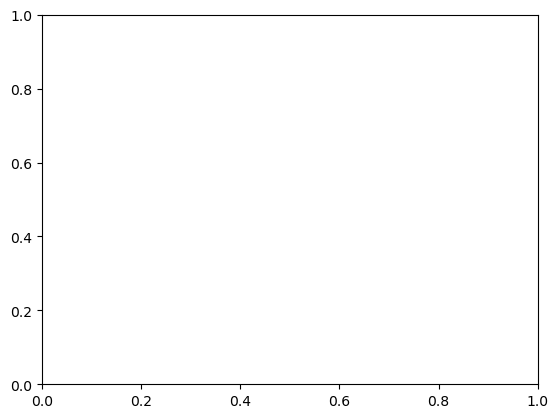

In [14]:
plt.figure()  # create a plot figure

#plt.xlabel('Minutes from the event', fontsize = 10)
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['figure.dpi'] = 600

       # create the first of two panels and set current axis
plt.subplot(1, 1, 1) # (rows, columns, panel number)

plt.plot(rilapses, riiv_2, color='green',label='Richmond RAAF')
plt.plot(sylapses, syiv_2, color='blue', label='Syd Airport')
plt.plot(bdlapses, bdiv_2, color='crimson', label='Badgerys Creek')
plt.plot(molapses, moiv_2, color='cyan', label='Moree Aero')
plt.plot(tmlapses, tmiv_2, color='sienna', label='Tamworth Airport')
plt.plot(walapses, waiv_2, color='orange', label='Wagga Wagga Airport')



#plt.ylabel("(Degree Celsius)", fontsize=20)
plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-24,24)
#plt.ylim(0,10,1)
plt.xticks(np.arange(-24,25,6))
plt.title("Inverted V index", loc = 'right', fontsize = 12)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x',labelsize=15, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")

leg = plt.legend(loc ="lower left", frameon=False, fontsize=10)
#ax1.get_xaxis().set_visible(False)
plt.tight_layout(pad=3.0)

In [ ]:
plt.figure()  # create a plot figure

#plt.xlabel('Minutes from the event', fontsize = 10)
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['figure.dpi'] = 600

       # create the first of two panels and set current axis
plt.subplot(1, 1, 1) # (rows, columns, panel number)

plt.plot(rilapses, riiv_3, color='green',label='Richmond RAAF')
plt.plot(sylapses, syiv_3, color='blue', label='Syd Airport')
plt.plot(bdlapses, bdiv_3, color='crimson', label='Badgerys Creek')
plt.plot(molapses, moiv_3, color='cyan', label='Moree Aero')
plt.plot(tmlapses, tmiv_3, color='sienna', label='Tamworth Airport')
plt.plot(walapses, waiv_3, color='orange', label='Wagga Wagga Airport')



#plt.ylabel("(Degree Celsius)", fontsize=20)
plt.xlabel('Hours from the event', fontsize = 20)
#ax1.set_xlim([pd.to_datetime('2003-08-23 19:30:00'), pd.to_datetime('2003-08-24 19:30:00')])
plt.xlim(-24,24)
#plt.ylim(0,10,1)
plt.xticks(np.arange(-24,25,6))
plt.title("Inverted V index", loc = 'right', fontsize = 12)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x',labelsize=15, rotation = 45)

plt.axvline(x = 0, color = "black", ls = "--")

leg = plt.legend(loc ="lower left", frameon=False, fontsize=10)
#ax1.get_xaxis().set_visible(False)
plt.tight_layout(pad=3.0)